In [247]:
# Instalación de Complementos
!pip install pandas openpyxl
!pip install wordcloud
!pip install sweetviz
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [248]:
#Cargamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from collections import Counter
import re
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
import pandas as pd
import matplotlib.pyplot as plt

In [249]:
# Cargar bases de datos planta

df_planta = pd.read_csv('https://raw.githubusercontent.com/ivandiaz25/Proyecto-FB/refs/heads/master/3%20Entrega/bases%20de%20datos%20a%20cargar/Final/BD_Planta%20Virtual.csv')
df_planta.head()

,ConsecutivoOP,ConsecPedido,Cliente,Producto,NombProducto,OCCliente,Actividad,RecMAQ,RecHOM,SecAct,FechEstInicil,estado,TipoConsecutivo
0,65433,26765,860009808,30351506C,PTNA INT 16X103X301,4530313020,CORT2,OXICORTE Y PLASMA,CORTAR,1,08/03/2021 00:00,FI,FBORP
1,54312,23311,890100251,1018018,"CDNA FB 864-K443-C2-P7""",4500529054,ENSA,PRENSA ANCLAJES,FORJADO,1,1/25/2019 0:00,FI,FBORP
2,66729,27177,860009808,30179097,"CDNA FB-6830-K2-C2 P 6""",4500556454,EMPA,BANCO DE TRABAJO DESPACHO,PRODUCTO TERMINADO,7,10/02/2021 00:00,FI,FBORP
3,67135,27380,860009808,30321162D,PTNA INT ADIT 9.5X152X349,E-MAIL 02/11/2021,ENDE,"PRENSA ANCLAJES, PLATINAS Y TROQUELADORAS",FORJADO,4,11/04/2021 00:00,FI,FBORP
4,67133,27380,860009808,30321162B,PTNA CAB 9.5X78X349,E-MAIL 02/11/2021,CORT2,OXICORTE Y PLASMA,CORTAR,1,11/04/2021 00:00,FI,FBORP


In [250]:
# Cargar base de datos Informe servicio técnico

df_informe = pd.read_csv(
    'https://raw.githubusercontent.com/ivandiaz25/Proyecto-FB/refs/heads/master/3%20Entrega/bases%20de%20datos%20a%20cargar/Final/BD_Informe%20Servicio.csv',
    encoding='ISO-8859-1'  # Reemplaza con la codificación detectada
)
df_informe.head()


,Fecha de visita,Empresa,Planta,PaÃ­s,Ciudad,Tipo de equipo,Pedido,Material,Causa de desgaste,"Si escogiÃ³ otros, cuÃ¡l?",...,Medida sin desgaste en mm2 (RODILLO),Medida actual en mm2 (RODILLO),Porcentaje de desgaste actual % (RODILLO),Altura de la platina en mm,Medida actual de la platina en mm (PLATINA),Porcentaje de desgaste actual % (PLATINA),Paso en mm,Cantidad de pasos,Falla,Valor
0,12/05/2022,HOLCIM,NOBSA,COLOMBIA,BOYACA,Elevador cangilones,26765,CLINKER,ElongaciÃ³n prematura;DesalineaciÃ³n;Otros,DESGASTE DE GUIAS,...,NaN,NaN,NaN,102.0,101.0,0.980,177.8,6.0,Desgaste,0.980
1,3/15/2022,ARGOS,SOGAMOSO,COLOMBIA,SOGAMOSO,Elevador cangilones,23311,CLINKER,ElongaciÃ³n prematura;CavitaciÃ³n seca,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Elongación,1.680
2,07/07/2023,HOLCIM,NaN,COLOMBIA,BOYACA,Elevador cangilones,27177,NaN,DesalineaciÃ³n,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Elongación,0.260
3,12/05/2022,HOLCIM,BOYACA,COLOMBIA,BOYACA,Reclamador y apilador,27380,PIEDRA CALIZA,ElongaciÃ³n prematura;Otros,EXCESIVA TENSION,...,NaN,NaN,NaN,350.0,349.0,0.286,250.0,6.0,Desgaste,0.286
4,12/05/2022,HOLCIM,BOYACA,COLOMBIA,BOYACA,Reclamador y apilador,27380,PIEDRA CALIZA,ElongaciÃ³n prematura;Otros,EXCESIVA TENSION,...,NaN,NaN,NaN,350.0,349.0,0.286,250.0,6.0,Desgaste,0.286


In [251]:
#unir bases de datos
BD_fallas = pd.merge(
    df_planta, 
    df_informe, 
    left_on="ConsecPedido", 
    right_on="Pedido", 
    how="inner"  # Cambia a 'left', 'right' o 'outer' según el tipo de unión que necesites
)

# Mostrar las primeras filas del DataFrame resultante
BD_fallas.head()



,ConsecutivoOP,ConsecPedido,Cliente,Producto,NombProducto,OCCliente,Actividad,RecMAQ,RecHOM,SecAct,...,Medida sin desgaste en mm2 (RODILLO),Medida actual en mm2 (RODILLO),Porcentaje de desgaste actual % (RODILLO),Altura de la platina en mm,Medida actual de la platina en mm (PLATINA),Porcentaje de desgaste actual % (PLATINA),Paso en mm,Cantidad de pasos,Falla,Valor
0,65433,26765,860009808,30351506C,PTNA INT 16X103X301,4530313020,CORT2,OXICORTE Y PLASMA,CORTAR,1,...,NaN,NaN,NaN,102.0,101.0,0.98,177.8,6.0,Desgaste,0.98
1,65433,26765,860009808,30351506C,PTNA INT 16X103X301,4530313020,CORT2,OXICORTE Y PLASMA,CORTAR,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desgaste,0.31
2,65433,26765,860009808,30351506C,PTNA INT 16X103X301,4530313020,CORT2,OXICORTE Y PLASMA,CORTAR,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Elongación,0.36
3,65433,26765,860009808,30351506C,PTNA INT 16X103X301,4530313020,CORT2,OXICORTE Y PLASMA,CORTAR,1,...,NaN,NaN,NaN,102.0,101.0,0.98,177.8,6.0,Desgaste,0.98
4,65431,26765,860009808,30351506A,BUJE ØE63.5XØI35.55X127.8,4530313020,CORT,MEGAS,CORTAR,1,...,NaN,NaN,NaN,102.0,101.0,0.98,177.8,6.0,Desgaste,0.98


In [252]:
# se verifica tamaño
BD_fallas.shape

(171, 47)

In [253]:
# Elimina duplicados dentro de cada grupo de ConsecPedido y NombProducto
BD_fallas = BD_fallas.drop_duplicates(subset=["ConsecPedido", "NombProducto"])

In [254]:
BD_fallas.shape

(47, 47)

In [255]:
# Verificación de nulos
print("\nNúmero de datos faltantes por columna:")
print(BD_fallas.isnull().sum())


Número de datos faltantes por columna:
ConsecutivoOP                                                   0
ConsecPedido                                                    0
Cliente                                                         0
Producto                                                        0
NombProducto                                                    0
OCCliente                                                       0
Actividad                                                       0
RecMAQ                                                          0
RecHOM                                                          0
SecAct                                                          0
FechEstInicil                                                   0
estado                                                          0
TipoConsecutivo                                                 0
Fecha de visita                                                 0
Empresa                             

In [256]:
# Se verifica tipo de variable
BD_fallas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, 0 to 170
Data columns (total 47 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   ConsecutivoOP                                                47 non-null     int64  
 1   ConsecPedido                                                 47 non-null     int64  
 2   Cliente                                                      47 non-null     object 
 3   Producto                                                     47 non-null     object 
 4   NombProducto                                                 47 non-null     object 
 5   OCCliente                                                    47 non-null     object 
 6   Actividad                                                    47 non-null     object 
 7   RecMAQ                                                       47 non-null     object 
 

In [257]:
# Se verifica las columnas de la BD
BD_fallas.columns

Index(['ConsecutivoOP', 'ConsecPedido', 'Cliente', 'Producto', 'NombProducto',
       'OCCliente', 'Actividad', 'RecMAQ', 'RecHOM', 'SecAct', 'FechEstInicil',
       'estado', 'TipoConsecutivo', 'Fecha de visita', 'Empresa', 'Planta',
       'PaÃ­s', 'Ciudad', 'Tipo de equipo', 'Pedido', 'Material',
       'Causa de desgaste', 'Si escogiÃ³ otros, cuÃ¡l?',
       'Escoja el desgaste donde se presenta', 'Tipo de cadena',
       'Referencia cadena',
       'Medida referencia de control desgaste nueva en mm (CADENA)',
       'Medida referencia control de desgaste actual en mm (CADENA)',
       'Porcentaje de elongaciÃ³n actual % (CADENA)',
       'Porcentaje de elongaciÃ³n mÃ¡x % (CADENA)',
       'ProyecciÃ³n en horas de operaciÃ³n restantes (H) (CADENA)',
       'Medida sin desgaste en mm (BUJE)', 'Medida actual en mm1 (BUJE)',
       'Porcentaje de desgaste actual % (BUJE)',
       'Medida sin desgaste en mm1 (PASADOR)', 'Medida actual en mm (PASADOR)',
       'Porcentaje de desgaste ac

In [258]:
# Correción de nombres de columnas

# Crear un diccionario para corregir los nombres de las columnas
correcciones = {
    'PaÃ­s': 'País',
    'Si escogiÃ³ otros, cuÃ¡l?': 'Si escogió otros, ¿cuál?',
    'Escoja el desgaste donde se presenta': 'Escoja el desgaste donde se presenta',
    'Porcentaje de elongaciÃ³n actual % (CADENA)': 'Porcentaje de elongación actual % (CADENA)',
    'Porcentaje de elongaciÃ³n mÃ¡x % (CADENA)': 'Porcentaje de elongación máx % (CADENA)',
    'ProyecciÃ³n en horas de operaciÃ³n restantes (H) (CADENA)': 'Proyección en horas de operación restantes (H) (CADENA)',
    'Medida sin desgaste en mm (BUJE)': 'Medida sin desgaste en mm (BUJE)',
    'Medida actual en mm1 (BUJE)': 'Medida actual en mm1 (BUJE)',
    'Porcentaje de desgaste actual % (BUJE)': 'Porcentaje de desgaste actual % (BUJE)',
    'Medida sin desgaste en mm1 (PASADOR)': 'Medida sin desgaste en mm1 (PASADOR)',
    'Medida actual en mm (PASADOR)': 'Medida actual en mm (PASADOR)',
    'Porcentaje de desgaste actual % (PASADOR)': 'Porcentaje de desgaste actual % (PASADOR)',
    'Medida sin desgaste en mm2 (RODILLO)': 'Medida sin desgaste en mm2 (RODILLO)',
    'Medida actual en mm2 (RODILLO)': 'Medida actual en mm2 (RODILLO)',
    'Porcentaje de desgaste actual % (RODILLO)': 'Porcentaje de desgaste actual % (RODILLO)',
    'Altura de la platina en mm': 'Altura de la platina en mm',
    'Medida actual de la platina en mm (PLATINA)': 'Medida actual de la platina en mm (PLATINA)',
    'Porcentaje de desgaste actual % (PLATINA)': 'Porcentaje de desgaste actual % (PLATINA)',
    'Paso en mm': 'Paso en mm',
    'Cantidad de pasos': 'Cantidad de pasos'
}

# Aplicar las correcciones al DataFrame
BD_fallas.rename(columns=correcciones, inplace=True)

# Verificar que los nombres de las columnas se han actualizado
print(BD_fallas.columns)

Index(['ConsecutivoOP', 'ConsecPedido', 'Cliente', 'Producto', 'NombProducto',
       'OCCliente', 'Actividad', 'RecMAQ', 'RecHOM', 'SecAct', 'FechEstInicil',
       'estado', 'TipoConsecutivo', 'Fecha de visita', 'Empresa', 'Planta',
       'País', 'Ciudad', 'Tipo de equipo', 'Pedido', 'Material',
       'Causa de desgaste', 'Si escogió otros, ¿cuál?',
       'Escoja el desgaste donde se presenta', 'Tipo de cadena',
       'Referencia cadena',
       'Medida referencia de control desgaste nueva en mm (CADENA)',
       'Medida referencia control de desgaste actual en mm (CADENA)',
       'Porcentaje de elongación actual % (CADENA)',
       'Porcentaje de elongación máx % (CADENA)',
       'Proyección en horas de operación restantes (H) (CADENA)',
       'Medida sin desgaste en mm (BUJE)', 'Medida actual en mm1 (BUJE)',
       'Porcentaje de desgaste actual % (BUJE)',
       'Medida sin desgaste en mm1 (PASADOR)', 'Medida actual en mm (PASADOR)',
       'Porcentaje de desgaste actual % 

In [259]:
# correción de variables para elongación 

# Obtener los valores únicos en la columna 'Causa de desgaste'
valores_unicos = BD_fallas['Causa de desgaste'].unique()

# Mostrar los valores únicos
print(valores_unicos)

['ElongaciÃ³n prematura;DesalineaciÃ³n;Otros'
 'ElongaciÃ³n prematura;CavitaciÃ³n seca' 'DesalineaciÃ³n'
 'ElongaciÃ³n prematura;Otros' 'CavitaciÃ³n seca' 'Otros'
 'DesalineaciÃ³n;ElongaciÃ³n prematura;Otros;Falta de lubricaciÃ³n;Ruptura'
 'Velocidad incorrecta;DesalineaciÃ³n'
 'DesalineaciÃ³n;CavitaciÃ³n seca;Otros' nan
 'Medidas fuera de especificaciÃ³n' 'Ruptura' 'ElongaciÃ³n prematura'
 'Falta de lubricaciÃ³n']


In [260]:
# Corregir el nombre de los resultados de la variable 'Causa de desgaste'
# Definir un diccionario para corregir los errores de escritura
correcciones = {
    'ElongaciÃ³n prematura;DesalineaciÃ³n;Otros': 'Elongación prematura;Desalineación;Otros',
    'ElongaciÃ³n prematura;CavitaciÃ³n seca': 'Elongación prematura;Cavitación seca',
    'DesalineaciÃ³n': 'Desalineación',
    'ElongaciÃ³n prematura;Otros': 'Elongación prematura;Otros',
    'CavitaciÃ³n seca': 'Cavitación seca',
    'Otros': 'Otros',
    'DesalineaciÃ³n;ElongaciÃ³n prematura;Otros;Falta de lubricaciÃ³n;Ruptura': 'Desalineación;Elongación prematura;Otros;Falta de lubricación;Ruptura',
    'Velocidad incorrecta;DesalineaciÃ³n': 'Velocidad incorrecta;Desalineación',
    'DesalineaciÃ³n;CavitaciÃ³n seca;Otros': 'Desalineación;Cavitación seca;Otros',
    'Medidas fuera de especificaciÃ³n': 'Medidas fuera de especificación',
    'Ruptura': 'Ruptura',
    'ElongaciÃ³n prematura': 'Elongación prematura',
    'Falta de lubricaciÃ³n': 'Falta de lubricación'
}

# Reemplazar las cadenas incorrectas en la columna 'Causa de desgaste'
BD_fallas['Causa de desgaste'] = BD_fallas['Causa de desgaste'].replace(correcciones)

# Verificar los resultados para asegurar que la corrección se realizó correctamente
print(BD_fallas['Causa de desgaste'].unique())

['Elongación prematura;Desalineación;Otros'
 'Elongación prematura;Cavitación seca' 'Desalineación'
 'Elongación prematura;Otros' 'Cavitación seca' 'Otros'
 'Desalineación;Elongación prematura;Otros;Falta de lubricación;Ruptura'
 'Velocidad incorrecta;Desalineación'
 'Desalineación;Cavitación seca;Otros' nan
 'Medidas fuera de especificación' 'Ruptura' 'Elongación prematura'
 'Falta de lubricación']


In [261]:
# correción de variables para material

# Obtener los valores únicos en la columna 'Material'
valores_unicos2 = BD_fallas['Material'].unique()

# Mostrar los valores únicos
print(valores_unicos2)


['CLINKER' nan 'PIEDRA CALIZA' 'PUZOLANA, CALIZA' 'CORRECTORES' 'CAÃ\x91A'
 'COMBUSTIBLES ALTERNOS' 'CEMENTO' 'CARBÃ\x93N GRANULADO' 'HARINA CRUDA']


In [262]:
# Corregir los valores en la columna 'Material'
BD_fallas['Material'] = BD_fallas['Material'].replace({
    'CAÃ\x91A': 'CAÑA',
    'CARBÃ\x93N GRANULADO': 'CARBÓN GRANULADO',
    np.nan: 'DESCONOCIDO' 
})

# Mostrar los valores únicos después de la corrección
print(BD_fallas['Material'].unique())

['CLINKER' 'DESCONOCIDO' 'PIEDRA CALIZA' 'PUZOLANA, CALIZA' 'CORRECTORES'
 'CAÑA' 'COMBUSTIBLES ALTERNOS' 'CEMENTO' 'CARBÓN GRANULADO'
 'HARINA CRUDA']


In [263]:
# correción de variables para pais

# Obtener los valores únicos en la columna 'Material'
valores_unicos3 = BD_fallas['País'].unique()

# Mostrar los valores únicos
print(valores_unicos3)

['COLOMBIA' 'MEXICO' 'PANAMÃ\x81']


In [264]:
# Corregir los valores en la columna 'País'
BD_fallas['País'] = BD_fallas['País'].replace({
    'PANAMÃ\x81': 'PANAMÁ'
})

# Mostrar los valores únicos después de la corrección
print(BD_fallas['País'].unique())


['COLOMBIA' 'MEXICO' 'PANAMÁ']


In [265]:
# Convertir las columnas a formato de fecha
BD_fallas['FechEstInicil'] = pd.to_datetime(BD_fallas['FechEstInicil'], errors='coerce')
BD_fallas['Fecha de visita'] = pd.to_datetime(BD_fallas['Fecha de visita'], errors='coerce')

# Mostrar los primeros registros para verificar
print(BD_fallas[['FechEstInicil', 'Fecha de visita']].head())

   FechEstInicil Fecha de visita
0     2021-08-03      2022-12-05
4     2021-08-03      2022-12-05
8     2021-07-01      2022-12-05
12    2021-07-02      2022-12-05
16    2019-01-25      2022-03-15


In [266]:
BD_fallas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, 0 to 170
Data columns (total 47 columns):
 #   Column                                                       Non-Null Count  Dtype         
---  ------                                                       --------------  -----         
 0   ConsecutivoOP                                                47 non-null     int64         
 1   ConsecPedido                                                 47 non-null     int64         
 2   Cliente                                                      47 non-null     object        
 3   Producto                                                     47 non-null     object        
 4   NombProducto                                                 47 non-null     object        
 5   OCCliente                                                    47 non-null     object        
 6   Actividad                                                    47 non-null     object        
 7   RecMAQ                 

In [267]:
BD_fallas.head()

,ConsecutivoOP,ConsecPedido,Cliente,Producto,NombProducto,OCCliente,Actividad,RecMAQ,RecHOM,SecAct,...,Medida sin desgaste en mm2 (RODILLO),Medida actual en mm2 (RODILLO),Porcentaje de desgaste actual % (RODILLO),Altura de la platina en mm,Medida actual de la platina en mm (PLATINA),Porcentaje de desgaste actual % (PLATINA),Paso en mm,Cantidad de pasos,Falla,Valor
0,65433,26765,860009808,30351506C,PTNA INT 16X103X301,4530313020,CORT2,OXICORTE Y PLASMA,CORTAR,1,...,NaN,NaN,NaN,102.0,101.0,0.98,177.8,6.0,Desgaste,0.98
4,65431,26765,860009808,30351506A,BUJE ØE63.5XØI35.55X127.8,4530313020,CORT,MEGAS,CORTAR,1,...,NaN,NaN,NaN,102.0,101.0,0.98,177.8,6.0,Desgaste,0.98
8,65430,26765,860009808,30351506,"CDNA FB-984 ADIT K443-C2-P7""",4530313020,PINA1,BANCO DE TRABAJO ENSAMBLE,PRODUCTO TERMINADO,4,...,NaN,NaN,NaN,102.0,101.0,0.98,177.8,6.0,Desgaste,0.98
12,65434,26765,860009808,30351506D,PTNA EXT ADIT16X122.2X271 -90°,4530313020,CORT4,OXICORTE Y PLASMA,CORTAR,1,...,NaN,NaN,NaN,102.0,101.0,0.98,177.8,6.0,Desgaste,0.98
16,54312,23311,890100251,1018018,"CDNA FB 864-K443-C2-P7""",4500529054,ENSA,PRENSA ANCLAJES,FORJADO,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Elongación,1.68


In [268]:
# cambio de formato de fecha

# Convertir las columnas 'FechEstInicil' y 'Fecha de visita' a formato datetime
BD_fallas['FechEstInicil'] = pd.to_datetime(BD_fallas['FechEstInicil'], errors='coerce')
BD_fallas['Fecha de visita'] = pd.to_datetime(BD_fallas['Fecha de visita'], errors='coerce')

# Crear una nueva columna 'Tiempo hasta falla' que sea la diferencia en días entre 'FechEstInicil' y 'Fecha de visita'
BD_fallas['Tiempo hasta falla (Dias)'] = (BD_fallas['Fecha de visita'] - BD_fallas['FechEstInicil']).dt.days

# Verificar las primeras filas para asegurarse de que todo esté correcto
BD_fallas.head()


,ConsecutivoOP,ConsecPedido,Cliente,Producto,NombProducto,OCCliente,Actividad,RecMAQ,RecHOM,SecAct,...,Medida actual en mm2 (RODILLO),Porcentaje de desgaste actual % (RODILLO),Altura de la platina en mm,Medida actual de la platina en mm (PLATINA),Porcentaje de desgaste actual % (PLATINA),Paso en mm,Cantidad de pasos,Falla,Valor,Tiempo hasta falla (Dias)
0,65433,26765,860009808,30351506C,PTNA INT 16X103X301,4530313020,CORT2,OXICORTE Y PLASMA,CORTAR,1,...,NaN,NaN,102.0,101.0,0.98,177.8,6.0,Desgaste,0.98,489
4,65431,26765,860009808,30351506A,BUJE ØE63.5XØI35.55X127.8,4530313020,CORT,MEGAS,CORTAR,1,...,NaN,NaN,102.0,101.0,0.98,177.8,6.0,Desgaste,0.98,489
8,65430,26765,860009808,30351506,"CDNA FB-984 ADIT K443-C2-P7""",4530313020,PINA1,BANCO DE TRABAJO ENSAMBLE,PRODUCTO TERMINADO,4,...,NaN,NaN,102.0,101.0,0.98,177.8,6.0,Desgaste,0.98,522
12,65434,26765,860009808,30351506D,PTNA EXT ADIT16X122.2X271 -90°,4530313020,CORT4,OXICORTE Y PLASMA,CORTAR,1,...,NaN,NaN,102.0,101.0,0.98,177.8,6.0,Desgaste,0.98,521
16,54312,23311,890100251,1018018,"CDNA FB 864-K443-C2-P7""",4500529054,ENSA,PRENSA ANCLAJES,FORJADO,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Elongación,1.68,1145


In [269]:
# Verificación de nulos
print("\nNúmero de datos faltantes por columna:")
print(BD_fallas.isnull().sum())


Número de datos faltantes por columna:
ConsecutivoOP                                                   0
ConsecPedido                                                    0
Cliente                                                         0
Producto                                                        0
NombProducto                                                    0
OCCliente                                                       0
Actividad                                                       0
RecMAQ                                                          0
RecHOM                                                          0
SecAct                                                          0
FechEstInicil                                                   0
estado                                                          0
TipoConsecutivo                                                 0
Fecha de visita                                                 0
Empresa                             

In [270]:
# Rellenar los valores nulos con la cadena 'No Aplica'
BD_fallas = BD_fallas.fillna('No Aplica')

# Verificar las primeras filas para asegurarte que los nulos fueron reemplazados
BD_fallas.head()

,ConsecutivoOP,ConsecPedido,Cliente,Producto,NombProducto,OCCliente,Actividad,RecMAQ,RecHOM,SecAct,...,Medida actual en mm2 (RODILLO),Porcentaje de desgaste actual % (RODILLO),Altura de la platina en mm,Medida actual de la platina en mm (PLATINA),Porcentaje de desgaste actual % (PLATINA),Paso en mm,Cantidad de pasos,Falla,Valor,Tiempo hasta falla (Dias)
0,65433,26765,860009808,30351506C,PTNA INT 16X103X301,4530313020,CORT2,OXICORTE Y PLASMA,CORTAR,1,...,No Aplica,No Aplica,102.0,101.0,0.98,177.8,6.0,Desgaste,0.98,489
4,65431,26765,860009808,30351506A,BUJE ØE63.5XØI35.55X127.8,4530313020,CORT,MEGAS,CORTAR,1,...,No Aplica,No Aplica,102.0,101.0,0.98,177.8,6.0,Desgaste,0.98,489
8,65430,26765,860009808,30351506,"CDNA FB-984 ADIT K443-C2-P7""",4530313020,PINA1,BANCO DE TRABAJO ENSAMBLE,PRODUCTO TERMINADO,4,...,No Aplica,No Aplica,102.0,101.0,0.98,177.8,6.0,Desgaste,0.98,522
12,65434,26765,860009808,30351506D,PTNA EXT ADIT16X122.2X271 -90°,4530313020,CORT4,OXICORTE Y PLASMA,CORTAR,1,...,No Aplica,No Aplica,102.0,101.0,0.98,177.8,6.0,Desgaste,0.98,521
16,54312,23311,890100251,1018018,"CDNA FB 864-K443-C2-P7""",4500529054,ENSA,PRENSA ANCLAJES,FORJADO,1,...,No Aplica,No Aplica,No Aplica,No Aplica,No Aplica,No Aplica,No Aplica,Elongación,1.68,1145


In [271]:
# Verificamos nulos nuevamente
print("\nNúmero de datos faltantes por columna:")
print(BD_fallas.isnull().sum())


Número de datos faltantes por columna:
ConsecutivoOP                                                  0
ConsecPedido                                                   0
Cliente                                                        0
Producto                                                       0
NombProducto                                                   0
OCCliente                                                      0
Actividad                                                      0
RecMAQ                                                         0
RecHOM                                                         0
SecAct                                                         0
FechEstInicil                                                  0
estado                                                         0
TipoConsecutivo                                                0
Fecha de visita                                                0
Empresa                                           

In [272]:
# Función personalizada para revisar y reemplazar los valores de la columna 'NombProducto'
def reemplazar_producto(nombre):
    if 'PTNA' in nombre:
        return 'PLATINA'
    elif 'BUJE' in nombre:
        return 'BUJE'
    elif 'CDNA' in nombre:
        return 'CADENA'
    elif 'PASADOR' in nombre:
        return 'PASADOR'
    elif 'RODILLO' in nombre:
        return 'RODILLO'
    else:
        return nombre  # Si no coincide con ninguna palabra, mantener el valor original

# Aplicar la función a la columna 'NombProducto'
BD_fallas['NombProducto'] = BD_fallas['NombProducto'].apply(reemplazar_producto)

# Verificar las primeras filas para asegurarte de que los cambios se realizaron correctamente
BD_fallas.head()


,ConsecutivoOP,ConsecPedido,Cliente,Producto,NombProducto,OCCliente,Actividad,RecMAQ,RecHOM,SecAct,...,Medida actual en mm2 (RODILLO),Porcentaje de desgaste actual % (RODILLO),Altura de la platina en mm,Medida actual de la platina en mm (PLATINA),Porcentaje de desgaste actual % (PLATINA),Paso en mm,Cantidad de pasos,Falla,Valor,Tiempo hasta falla (Dias)
0,65433,26765,860009808,30351506C,PLATINA,4530313020,CORT2,OXICORTE Y PLASMA,CORTAR,1,...,No Aplica,No Aplica,102.0,101.0,0.98,177.8,6.0,Desgaste,0.98,489
4,65431,26765,860009808,30351506A,BUJE,4530313020,CORT,MEGAS,CORTAR,1,...,No Aplica,No Aplica,102.0,101.0,0.98,177.8,6.0,Desgaste,0.98,489
8,65430,26765,860009808,30351506,CADENA,4530313020,PINA1,BANCO DE TRABAJO ENSAMBLE,PRODUCTO TERMINADO,4,...,No Aplica,No Aplica,102.0,101.0,0.98,177.8,6.0,Desgaste,0.98,522
12,65434,26765,860009808,30351506D,PLATINA,4530313020,CORT4,OXICORTE Y PLASMA,CORTAR,1,...,No Aplica,No Aplica,102.0,101.0,0.98,177.8,6.0,Desgaste,0.98,521
16,54312,23311,890100251,1018018,CADENA,4500529054,ENSA,PRENSA ANCLAJES,FORJADO,1,...,No Aplica,No Aplica,No Aplica,No Aplica,No Aplica,No Aplica,No Aplica,Elongación,1.68,1145


In [273]:
# Analizar valores unicos de variables mal escritas o con problemas numericos 

# Para los valores únicos de cada columna
valores_causa_desgaste = BD_fallas['Causa de desgaste'].unique()
#valores_no_conformidad = BD_fallas['No Conformidad'].unique()
valores_tiempo_hasta_falla = BD_fallas['Tiempo hasta falla (Dias)'].unique()

# Imprimir resultados
print("Valores únicos en 'Causa de desgaste':", valores_causa_desgaste)
#print("Valores únicos en 'No conformidad':", valores_no_conformidad)
print("Valores únicos en 'Tiempo hasta falla (Dias)':", valores_tiempo_hasta_falla)

Valores únicos en 'Causa de desgaste': ['Elongación prematura;Desalineación;Otros'
 'Elongación prematura;Cavitación seca' 'Desalineación'
 'Elongación prematura;Otros' 'Cavitación seca' 'Otros'
 'Desalineación;Elongación prematura;Otros;Falta de lubricación;Ruptura'
 'Velocidad incorrecta;Desalineación'
 'Desalineación;Cavitación seca;Otros' 'No Aplica'
 'Medidas fuera de especificación' 'Ruptura' 'Elongación prematura'
 'Falta de lubricación']
Valores únicos en 'Tiempo hasta falla (Dias)': [ 489  522  521 1145  643  396  883  982  278  499  276  343  342  -19
 -181 -140  196  178  426  846  894  592  806  166  -45]


### Graficos a incluir

Análisis cuantitativo de No conformidades

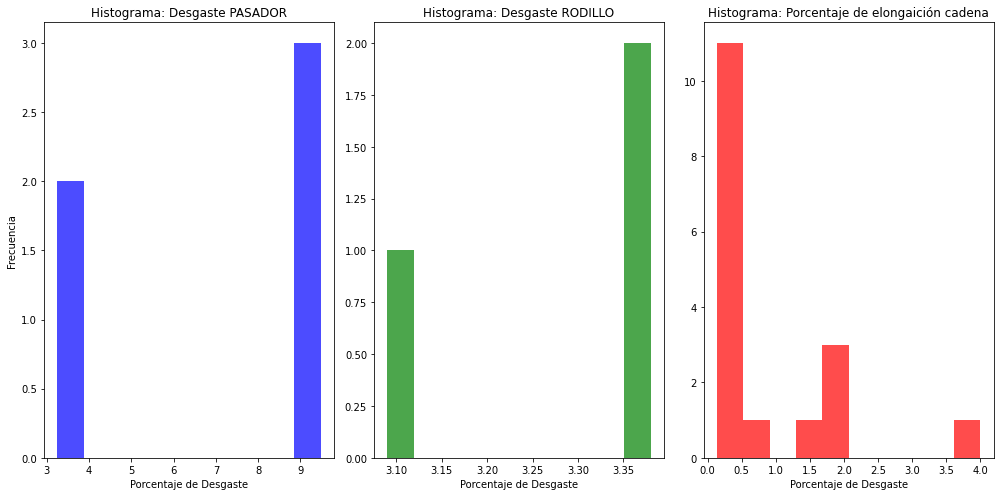

In [274]:
# Histograma para porcentaje de desgaste en piezas

# Cargar la base de datos
df = BD_fallas

# Seleccionar las columnas relacionadas con los porcentajes de desgaste
columns_desgaste = [
    'Porcentaje de desgaste actual % (PASADOR)', 
    'Porcentaje de desgaste actual % (RODILLO)', 
    'Porcentaje de elongación actual % (CADENA)'  
]

# Crear un nuevo DataFrame con las columnas de interés
df_desgaste = df[columns_desgaste]

# Convertir las columnas a numérico (por si hay valores no válidos)
df_desgaste = df_desgaste.apply(pd.to_numeric, errors='coerce')

# Crear el histograma para cada columna
plt.figure(figsize=(14, 7))

# Histograma para PASADOR
plt.subplot(1, 3, 1)
plt.hist(df_desgaste['Porcentaje de desgaste actual % (PASADOR)'].dropna(), bins=10, color='b', alpha=0.7)
plt.title('Histograma: Desgaste PASADOR')
plt.xlabel('Porcentaje de Desgaste')
plt.ylabel('Frecuencia')

# Histograma para RODILLO
plt.subplot(1, 3, 2)
plt.hist(df_desgaste['Porcentaje de desgaste actual % (RODILLO)'].dropna(), bins=10, color='g', alpha=0.7)
plt.title('Histograma: Desgaste RODILLO')
plt.xlabel('Porcentaje de Desgaste')

# Histograma para PLATINA (proxy de desgaste)
plt.subplot(1, 3, 3)
plt.hist(df_desgaste['Porcentaje de elongación actual % (CADENA)'].dropna(), bins=10, color='r', alpha=0.7)
plt.title('Histograma: Porcentaje de elongaición cadena')
plt.xlabel('Porcentaje de Desgaste')

plt.tight_layout()
plt.show()


C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



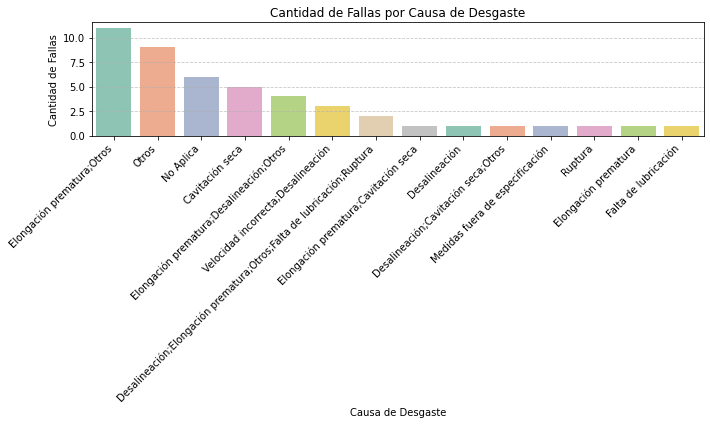

In [275]:
# Agrupar los datos por la columna "Causa de desgaste" y contar la frecuencia de cada tipo de falla
falla_counts = df['Causa de desgaste'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=falla_counts.index, y=falla_counts.values, palette='Set2', alpha=0.8)

# Personalización del gráfico
plt.title('Cantidad de Fallas por Causa de Desgaste')
plt.xlabel('Causa de Desgaste')
plt.ylabel('Cantidad de Fallas')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()



C:\Users\cesar\AppData\Local\Temp\ipykernel_13176\557434883.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use is

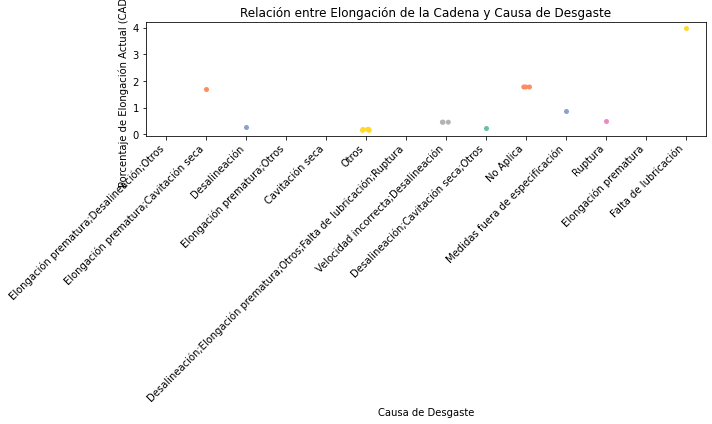

In [276]:

# Relación entre fallas y desgaste en cadena 

df_jitter = df[['Porcentaje de elongación actual % (CADENA)', 'Causa de desgaste']]

# Convertir la columna de porcentaje de elongación a numérico (por si hay valores no válidos)
df_jitter['Porcentaje de elongación actual % (CADENA)'] = pd.to_numeric(df_jitter['Porcentaje de elongación actual % (CADENA)'], errors='coerce')

# Crear el gráfico de dispersión con jitter para evitar solapamiento de puntos
plt.figure(figsize=(10, 6))
sns.stripplot(x='Causa de desgaste', y='Porcentaje de elongación actual % (CADENA)', data=df_jitter, jitter=True, palette="Set2")

# Personalización del gráfico
plt.title('Relación entre Elongación de la Cadena y Causa de Desgaste')
plt.xlabel('Causa de Desgaste')
plt.ylabel('Porcentaje de Elongación Actual (CADENA)')
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

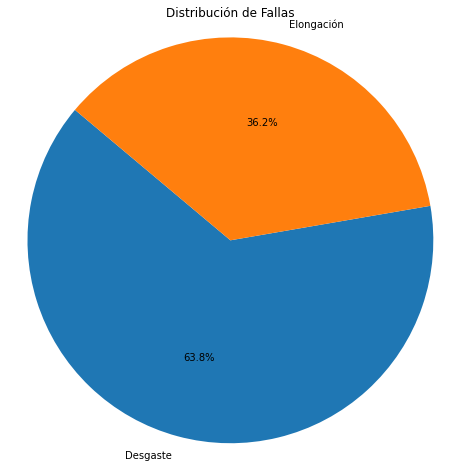

In [277]:
# Contar la frecuencia de cada categoría en la columna "Falla"
falla_counts = BD_fallas['Falla'].value_counts()

# Crear el gráfico circular
plt.figure(figsize=(8, 8))  # Tamaño del gráfico
plt.pie(falla_counts, labels=falla_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Fallas')
plt.axis('equal')  # Para que el gráfico sea un círculo
plt.show()


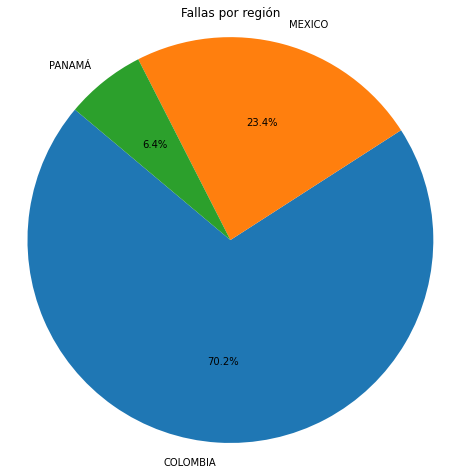

In [278]:
# Contar la frecuencia de cada categoría en la columna "Pais"
falla_counts = BD_fallas['País'].value_counts()

# Crear el gráfico circular
plt.figure(figsize=(8, 8))  # Tamaño del gráfico
plt.pie(falla_counts, labels=falla_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Fallas por región')
plt.axis('equal')  # Para que el gráfico sea un círculo
plt.show()

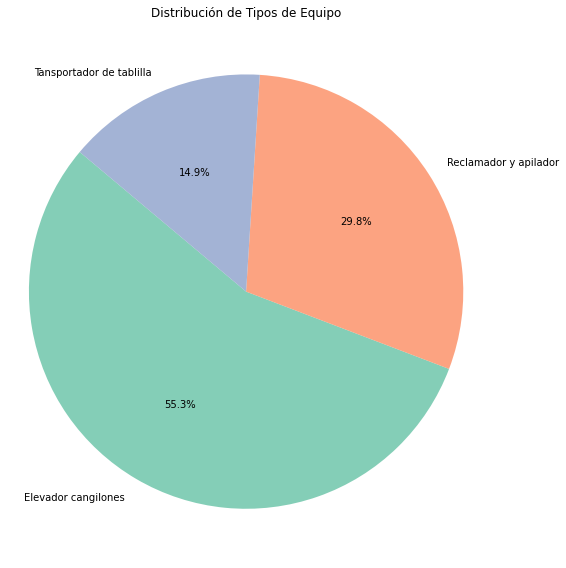

In [279]:
# Crear el gráfico circular
falla_counts3 = BD_fallas['Tipo de equipo'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(falla_counts3, labels=falla_counts3.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'), wedgeprops={'alpha':0.8})

# Personalización del gráfico
plt.title('Distribución de Tipos de Equipo')
plt.axis('equal')  # Para que el gráfico sea un círculo

plt.tight_layout()
plt.show()


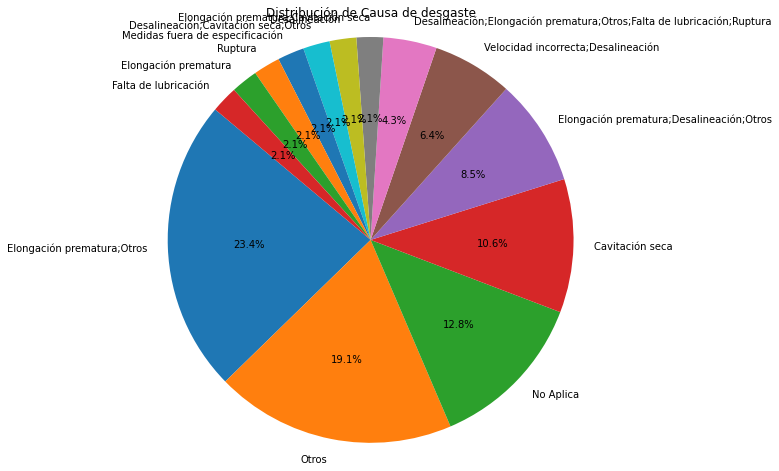

In [280]:
# Contar la frecuencia de cada categoría en la columna "Falla"
falla_counts = BD_fallas['Causa de desgaste'].value_counts()

# Crear el gráfico circular
plt.figure(figsize=(8, 8))  # Tamaño del gráfico
plt.pie(falla_counts, labels=falla_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Causa de desgaste')
plt.axis('equal')  # Para que el gráfico sea un círculo
plt.show()

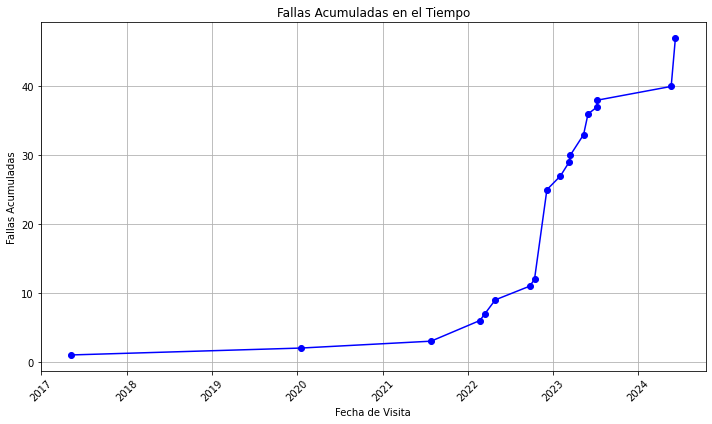

In [281]:
# Asegurarse de que la columna "Fecha de visita" esté en formato de fecha
BD_fallas['Fecha de visita'] = pd.to_datetime(BD_fallas['Fecha de visita'], errors='coerce')

# Filtrar los registros válidos que tengan fechas correctas
BD_fallas2 = BD_fallas.dropna(subset=['Fecha de visita'])

# Contar el número de fallas por fecha de visita
fallas_por_fecha = BD_fallas2.groupby(BD_fallas2['Fecha de visita'].dt.date).size()

# Calcular las fallas acumuladas
fallas_cumuladas = fallas_por_fecha.cumsum()

# Crear la gráfica
plt.figure(figsize=(10, 6))
fallas_cumuladas.plot(kind='line', marker='o', color='b')

# Configurar etiquetas y título
plt.title('Fallas Acumuladas en el Tiempo')
plt.xlabel('Fecha de Visita')
plt.ylabel('Fallas Acumuladas')
plt.grid(True)

# Ajustar las etiquetas del eje X para mayor claridad
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()

### Análisis gráfico de variables explicativas

In [282]:
# Para facilitar el manejo se va crear un nuevo dataframe
# Crear un nuevo dataframe con las columnas seleccionadas que son representativas para el analisis exploratorior

columnas_seleccionadas = ["NombProducto", "País", "Tipo de equipo", "Material", "Causa de desgaste", "Falla", "Valor","FechEstInicil","Fecha de visita"]
df_opt = BD_fallas[columnas_seleccionadas]

# Mostrar el nuevo dataframe
df_opt.head()

,NombProducto,País,Tipo de equipo,Material,Causa de desgaste,Falla,Valor,FechEstInicil,Fecha de visita
0,PLATINA,COLOMBIA,Elevador cangilones,CLINKER,Elongación prematura;Desalineación;Otros,Desgaste,0.98,2021-08-03,2022-12-05
4,BUJE,COLOMBIA,Elevador cangilones,CLINKER,Elongación prematura;Desalineación;Otros,Desgaste,0.98,2021-08-03,2022-12-05
8,CADENA,COLOMBIA,Elevador cangilones,CLINKER,Elongación prematura;Desalineación;Otros,Desgaste,0.98,2021-07-01,2022-12-05
12,PLATINA,COLOMBIA,Elevador cangilones,CLINKER,Elongación prematura;Desalineación;Otros,Desgaste,0.98,2021-07-02,2022-12-05
16,CADENA,COLOMBIA,Elevador cangilones,CLINKER,Elongación prematura;Cavitación seca,Elongación,1.68,2019-01-25,2022-03-15


In [283]:
# Filtrar las filas que contienen la palabra 'BUJE' en la columna 'NombProducto'
df_opt_BUJE = df_opt[df_opt['NombProducto'].str.contains('BUJE', case=False, na=False)]

# Mostrar el nuevo dataframe filtrado
df_opt_BUJE.head()

,NombProducto,País,Tipo de equipo,Material,Causa de desgaste,Falla,Valor,FechEstInicil,Fecha de visita
4,BUJE,COLOMBIA,Elevador cangilones,CLINKER,Elongación prematura;Desalineación;Otros,Desgaste,0.980,2021-08-03,2022-12-05
45,BUJE,COLOMBIA,Reclamador y apilador,PIEDRA CALIZA,Elongación prematura;Otros,Desgaste,0.286,2021-11-04,2022-12-05
99,BUJE,MEXICO,Elevador cangilones,"PUZOLANA, CALIZA",Cavitación seca,Desgaste,1.100,2022-01-06,2024-06-07
111,BUJE,MEXICO,Elevador cangilones,CLINKER,Otros,Elongación,0.140,2023-08-16,2024-05-20
119,BUJE,MEXICO,Tansportador de tablilla,CLINKER,Otros,Elongación,0.180,2023-01-25,2024-06-07


In [284]:
# Filtrar las filas que contienen la palabra 'CADENA' en la columna 'NombProducto'
df_opt_CDNA = df_opt[df_opt['NombProducto'].str.contains('CADENA', case=False, na=False)]

# Mostrar el nuevo dataframe filtrado
df_opt_CDNA.head(10)

,NombProducto,País,Tipo de equipo,Material,Causa de desgaste,Falla,Valor,FechEstInicil,Fecha de visita
8,CADENA,COLOMBIA,Elevador cangilones,CLINKER,Elongación prematura;Desalineación;Otros,Desgaste,0.980,2021-07-01,2022-12-05
16,CADENA,COLOMBIA,Elevador cangilones,CLINKER,Elongación prematura;Cavitación seca,Elongación,1.680,2019-01-25,2022-03-15
17,CADENA,COLOMBIA,Elevador cangilones,DESCONOCIDO,Desalineación,Elongación,0.260,2021-10-02,2023-07-07
54,CADENA,COLOMBIA,Reclamador y apilador,PIEDRA CALIZA,Elongación prematura;Otros,Desgaste,0.286,2021-11-04,2022-12-05
105,CADENA,MEXICO,Elevador cangilones,"PUZOLANA, CALIZA",Cavitación seca,Desgaste,1.100,2022-01-06,2024-06-07
109,CADENA,MEXICO,Elevador cangilones,CLINKER,Otros,Elongación,0.140,2023-08-16,2024-05-20
113,CADENA,MEXICO,Tansportador de tablilla,CLINKER,Otros,Elongación,0.180,2023-01-25,2024-06-07
124,CADENA,COLOMBIA,Reclamador y apilador,CAÑA,Desalineación;Elongación prematura;Otros;Falta...,Desgaste,3.380,2021-12-21,2022-09-23
130,CADENA,PANAMÁ,Elevador cangilones,COMBUSTIBLES ALTERNOS,Velocidad incorrecta;Desalineación,Elongación,0.450,2023-05-30,2023-05-11
141,CADENA,MEXICO,Elevador cangilones,CEMENTO,Cavitación seca,Desgaste,0.470,2023-07-28,2023-03-10


In [285]:
# Filtrar las filas que contienen la palabra 'PASADOR' en la columna 'NombProducto'
df_opt_PASADOR = df_opt[df_opt['NombProducto'].str.contains('PASADOR', case=False, na=False)]

# Mostrar el nuevo dataframe filtrado
df_opt_PASADOR.head()

,NombProducto,País,Tipo de equipo,Material,Causa de desgaste,Falla,Valor,FechEstInicil,Fecha de visita
102,PASADOR,MEXICO,Elevador cangilones,"PUZOLANA, CALIZA",Cavitación seca,Desgaste,1.10,2022-01-06,2024-06-07
116,PASADOR,MEXICO,Tansportador de tablilla,CLINKER,Otros,Elongación,0.18,2023-01-25,2024-06-07
136,PASADOR,PANAMÁ,Elevador cangilones,COMBUSTIBLES ALTERNOS,Velocidad incorrecta;Desalineación,Elongación,0.45,2023-05-30,2023-05-11
143,PASADOR,COLOMBIA,Elevador cangilones,CARBÓN GRANULADO,Otros,Desgaste,3.25,2022-07-20,2023-02-01
148,PASADOR,COLOMBIA,Elevador cangilones,CEMENTO,No Aplica,Desgaste,9.48,2020-12-22,2022-02-21


In [286]:
# Filtrar las filas que contienen la palabra 'PLATINA' en la columna 'NombProducto'
df_opt_PTNA = df_opt[df_opt['NombProducto'].str.contains('PLATINA', case=False, na=False)]

# Mostrar el nuevo dataframe filtrado
df_opt_PTNA.head()

,NombProducto,País,Tipo de equipo,Material,Causa de desgaste,Falla,Valor,FechEstInicil,Fecha de visita
0,PLATINA,COLOMBIA,Elevador cangilones,CLINKER,Elongación prematura;Desalineación;Otros,Desgaste,0.980,2021-08-03,2022-12-05
12,PLATINA,COLOMBIA,Elevador cangilones,CLINKER,Elongación prematura;Desalineación;Otros,Desgaste,0.980,2021-07-02,2022-12-05
18,PLATINA,COLOMBIA,Reclamador y apilador,PIEDRA CALIZA,Elongación prematura;Otros,Desgaste,0.286,2021-11-04,2022-12-05
27,PLATINA,COLOMBIA,Reclamador y apilador,PIEDRA CALIZA,Elongación prematura;Otros,Desgaste,0.286,2021-11-04,2022-12-05
36,PLATINA,COLOMBIA,Reclamador y apilador,PIEDRA CALIZA,Elongación prematura;Otros,Desgaste,0.286,2021-11-04,2022-12-05


In [287]:
# Filtrar las filas que contienen la palabra 'RODILLO' en la columna 'NombProducto'
df_opt_RODILLO = df_opt[df_opt['NombProducto'].str.contains('RODILLO', case=False, na=False)]

# Mostrar el nuevo dataframe filtrado
df_opt_RODILLO.head()

,NombProducto,País,Tipo de equipo,Material,Causa de desgaste,Falla,Valor,FechEstInicil,Fecha de visita
108,RODILLO,COLOMBIA,Reclamador y apilador,CORRECTORES,Otros,Desgaste,3.09,2020-02-04,2022-10-13
122,RODILLO,COLOMBIA,Reclamador y apilador,CAÑA,Desalineación;Elongación prematura;Otros;Falta...,Desgaste,3.38,2021-12-21,2022-09-23


C:\Users\cesar\AppData\Local\Temp\ipykernel_13176\48359633.py:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



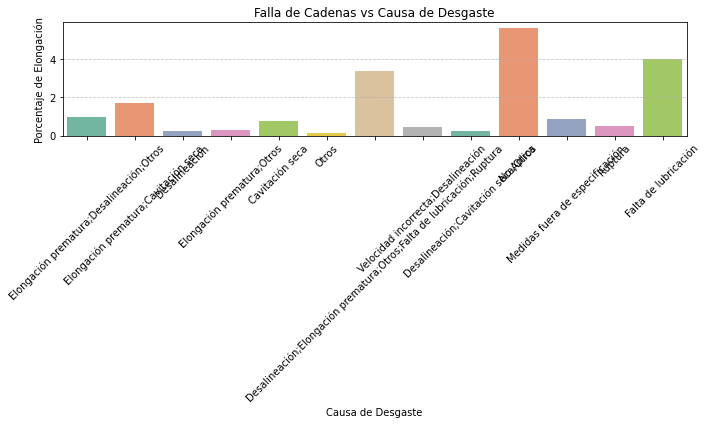

C:\Users\cesar\AppData\Local\Temp\ipykernel_13176\48359633.py:17: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



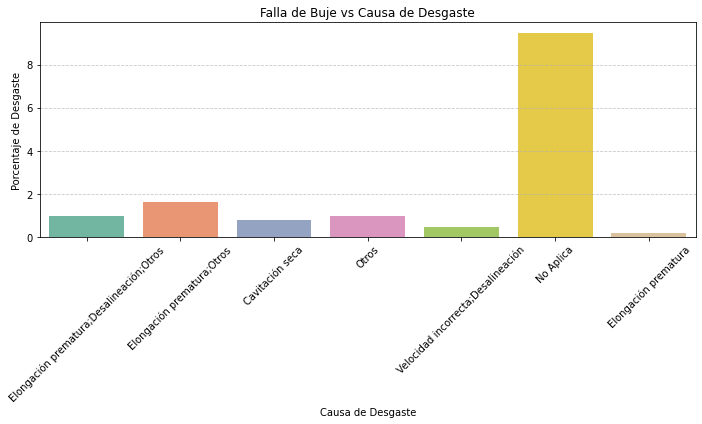

C:\Users\cesar\AppData\Local\Temp\ipykernel_13176\48359633.py:30: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



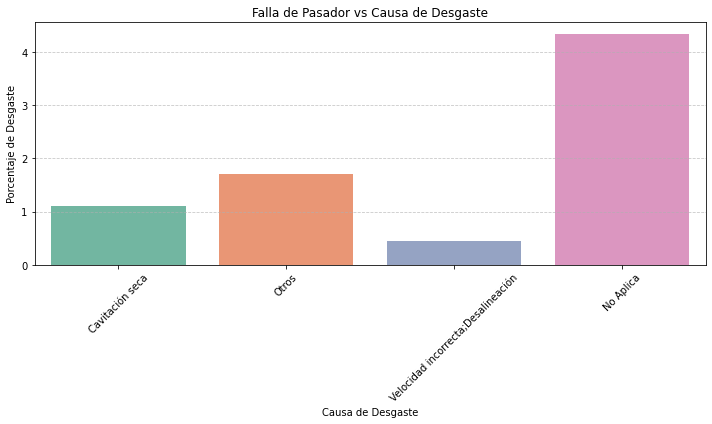

C:\Users\cesar\AppData\Local\Temp\ipykernel_13176\48359633.py:43: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



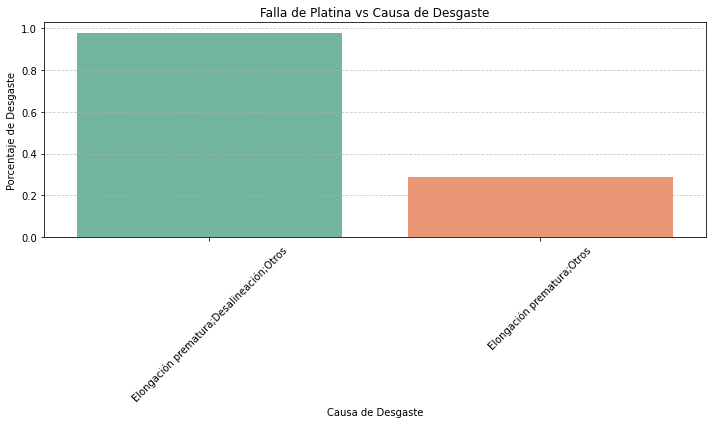

In [288]:
# Crear el gráfico de barras: Falla de cadenas vs Causa de desgaste
# Gráficos de barras: Falla vs Causa de Desgaste (Cadenas, Buje, Pasador, Platina)
plt.figure(figsize=(10, 6))
sns.barplot(x='Causa de desgaste', y='Valor', data=df_opt_CDNA, estimator='mean', ci=None, palette='Set2')

plt.xticks(rotation=45)
plt.title('Falla de Cadenas vs Causa de Desgaste')
plt.xlabel('Causa de Desgaste')
plt.ylabel('Porcentaje de Elongación')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Crear el gráfico de barras: Falla de Buje vs Causa de desgaste
plt.figure(figsize=(10, 6))
sns.barplot(x='Causa de desgaste', y='Valor', data=df_opt_BUJE, estimator='mean', ci=None, palette='Set2')

plt.xticks(rotation=45)
plt.title('Falla de Buje vs Causa de Desgaste')
plt.xlabel('Causa de Desgaste')
plt.ylabel('Porcentaje de Desgaste')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Crear el gráfico de barras: Falla de Pasador vs Causa de desgaste
plt.figure(figsize=(10, 6))
sns.barplot(x='Causa de desgaste', y='Valor', data=df_opt_PASADOR, estimator='mean', ci=None, palette='Set2')

plt.xticks(rotation=45)
plt.title('Falla de Pasador vs Causa de Desgaste')
plt.xlabel('Causa de Desgaste')
plt.ylabel('Porcentaje de Desgaste')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Crear el gráfico de barras: Falla de Platina vs Causa de desgaste
plt.figure(figsize=(10, 6))
sns.barplot(x='Causa de desgaste', y='Valor', data=df_opt_PTNA, estimator='mean', ci=None, palette='Set2')

plt.xticks(rotation=45)
plt.title('Falla de Platina vs Causa de Desgaste')
plt.xlabel('Causa de Desgaste')
plt.ylabel('Porcentaje de Desgaste')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


C:\Users\cesar\AppData\Local\Temp\ipykernel_13176\4049497769.py:13: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



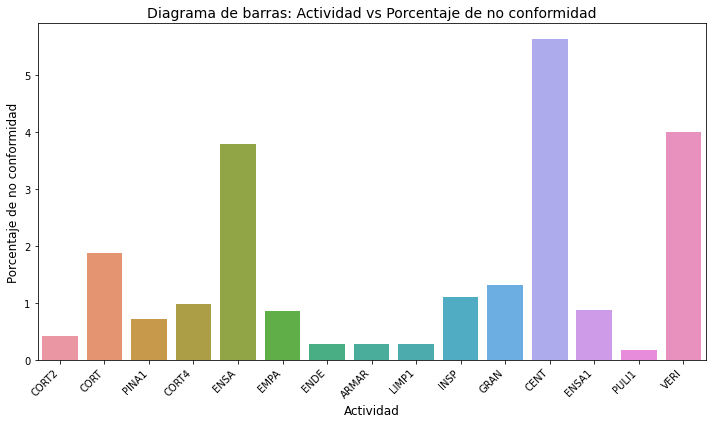

C:\Users\cesar\AppData\Local\Temp\ipykernel_13176\4049497769.py:13: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



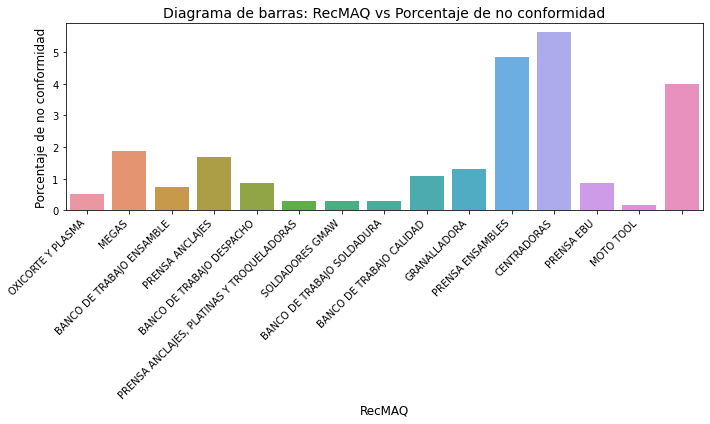

C:\Users\cesar\AppData\Local\Temp\ipykernel_13176\4049497769.py:13: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



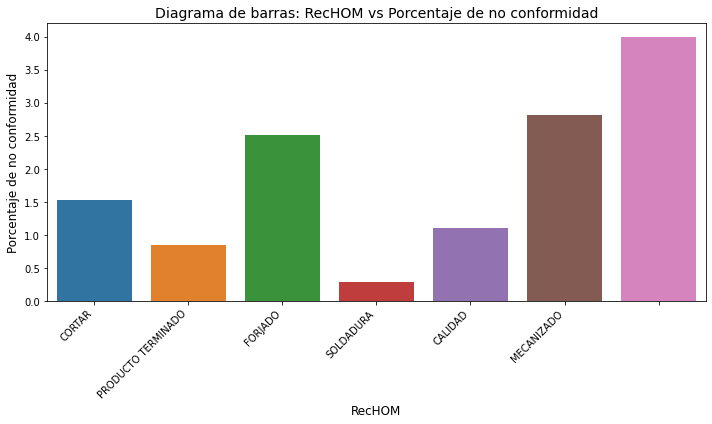

C:\Users\cesar\AppData\Local\Temp\ipykernel_13176\4049497769.py:13: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



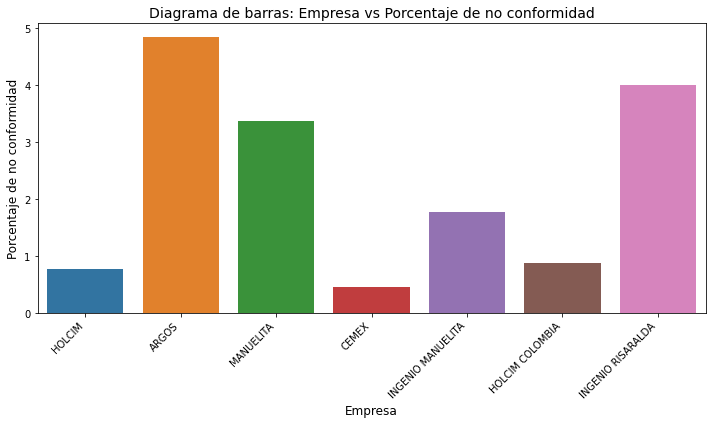

C:\Users\cesar\AppData\Local\Temp\ipykernel_13176\4049497769.py:13: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Local\Temp\ipykernel_13176\4049497769.py:24: UserWarning:

Glyph 129 (\x81) missing from current font.

C:\Users\cesar\AppData\

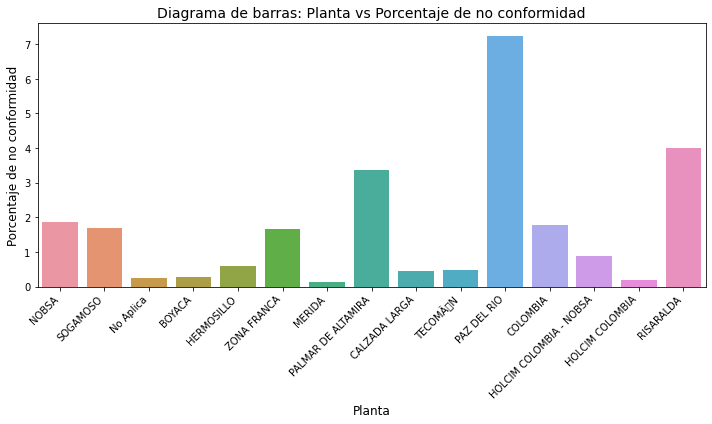

C:\Users\cesar\AppData\Local\Temp\ipykernel_13176\4049497769.py:13: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



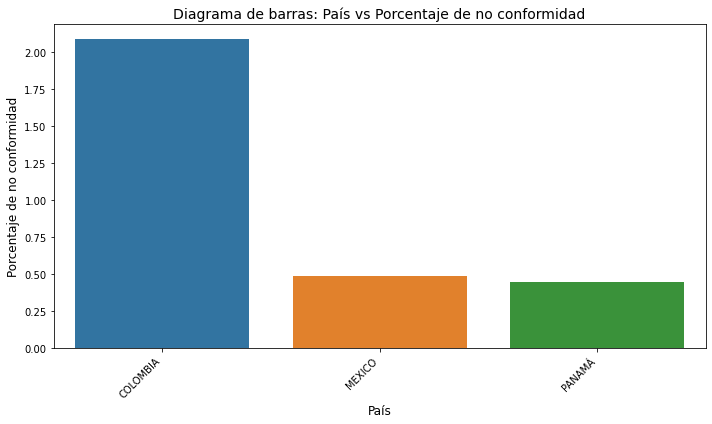

C:\Users\cesar\AppData\Local\Temp\ipykernel_13176\4049497769.py:13: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Local\Temp\ipykernel_13176\4049497769.py:24: UserWarning:

Glyph 129 (\x81) missing from current font.

C:\Users\cesar\AppData\

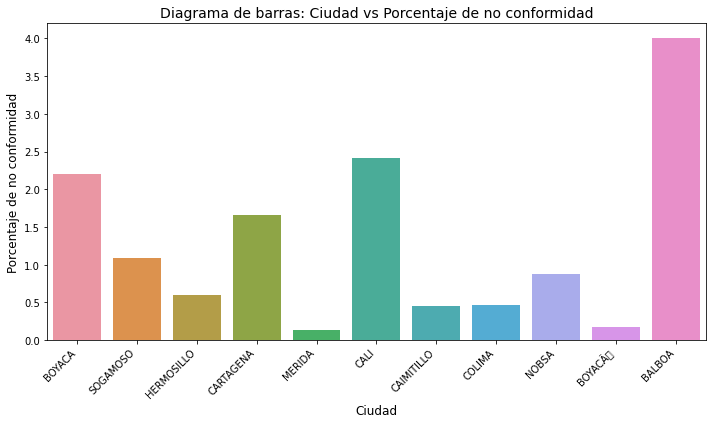

C:\Users\cesar\AppData\Local\Temp\ipykernel_13176\4049497769.py:13: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



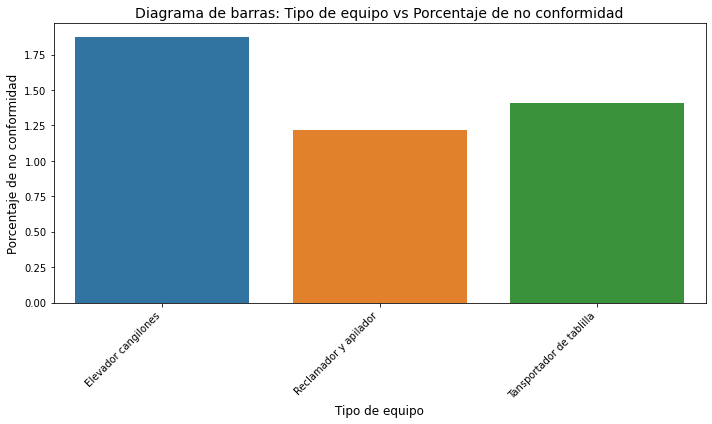

C:\Users\cesar\AppData\Local\Temp\ipykernel_13176\4049497769.py:13: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



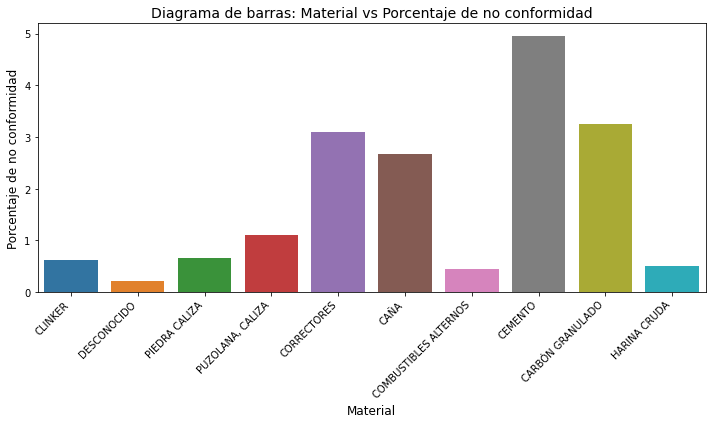

C:\Users\cesar\AppData\Local\Temp\ipykernel_13176\4049497769.py:13: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



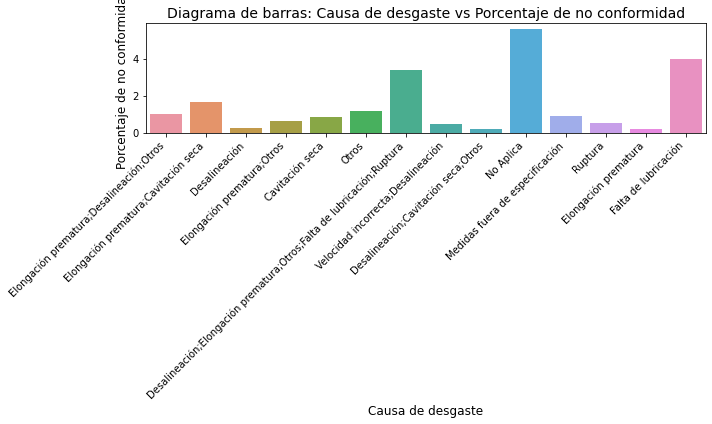

C:\Users\cesar\AppData\Local\Temp\ipykernel_13176\4049497769.py:13: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



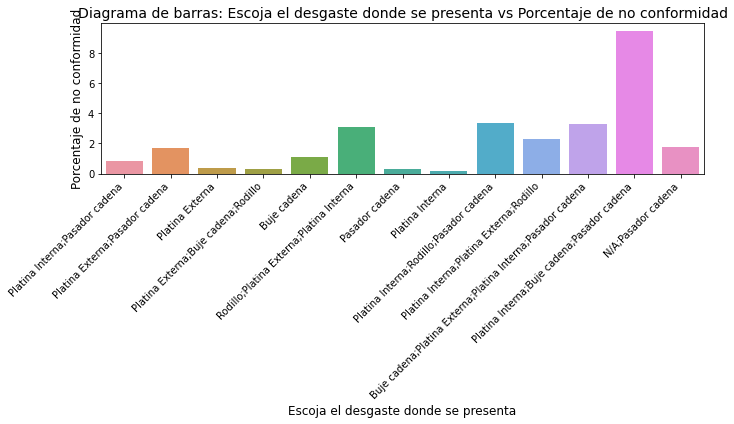

C:\Users\cesar\AppData\Local\Temp\ipykernel_13176\4049497769.py:13: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



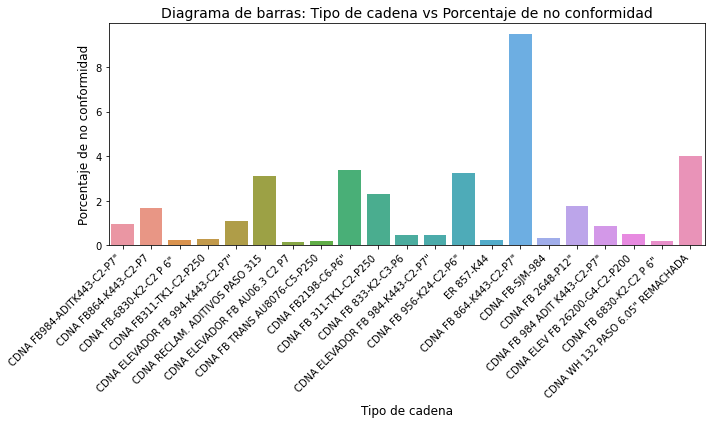

C:\Users\cesar\AppData\Local\Temp\ipykernel_13176\4049497769.py:13: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



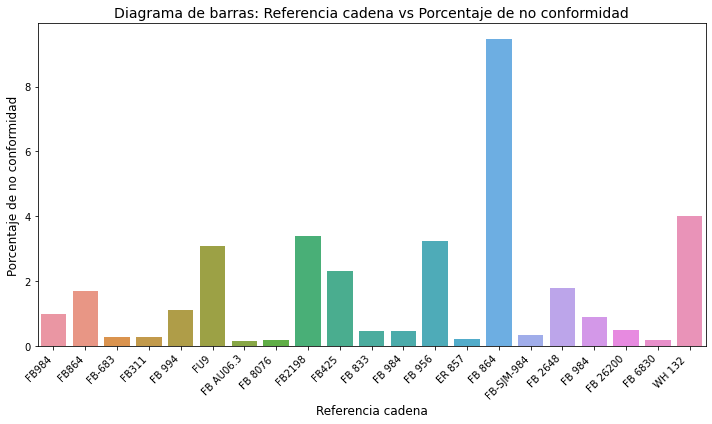

In [289]:
# Renombrar la columna 'Valor' a 'Porcentaje de no conformidad'
BD_fallas.rename(columns={'Valor': 'Porcentaje de no conformidad'}, inplace=True)

# Lista de las columnas que quieres graficar vs 'Porcentaje de no conformidad'
variables = ['Actividad', 'RecMAQ', 'RecHOM', 'Empresa', 'Planta', 'País', 
             'Ciudad', 'Tipo de equipo', 'Material', 'Causa de desgaste', 
             'Escoja el desgaste donde se presenta', 'Tipo de cadena', 'Referencia cadena']

# Crear un gráfico de barras para cada variable
for variable in variables:
    plt.figure(figsize=(10, 6))
    # Utilizamos seaborn para crear los diagramas de barras
    sns.barplot(data=BD_fallas, x=variable, y='Porcentaje de no conformidad', ci=None)
    
    # Ajustar el título y las etiquetas
    plt.title(f'Diagrama de barras: {variable} vs Porcentaje de no conformidad', fontsize=14)
    plt.xlabel(variable, fontsize=12)
    plt.ylabel('Porcentaje de no conformidad', fontsize=12)
    
    # Rotar etiquetas si son muchas categorías
    plt.xticks(rotation=45, ha='right')
    
    # Mostrar gráfico
    plt.tight_layout()
    plt.show()


### Análisis gráfico de variables explicativas bivariadas

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



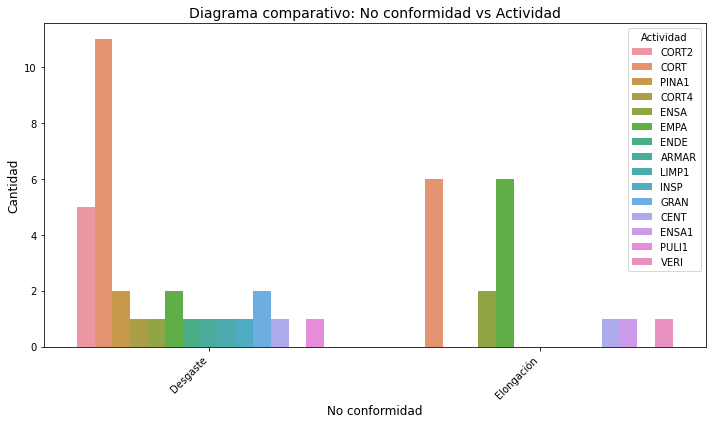

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



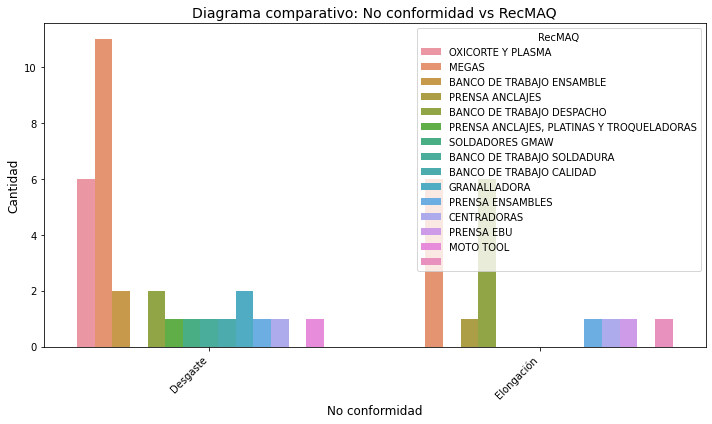

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



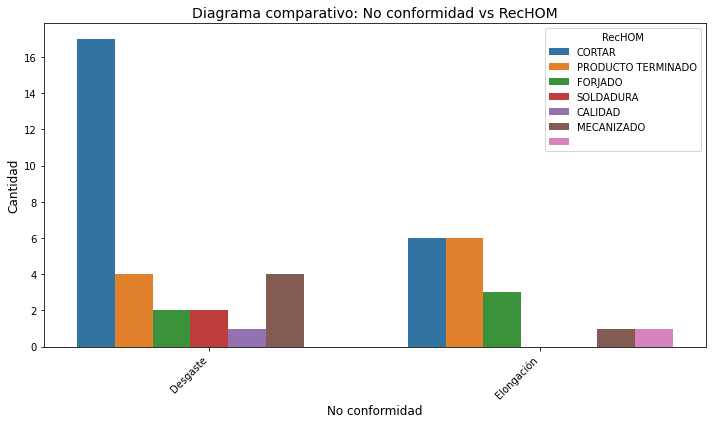

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



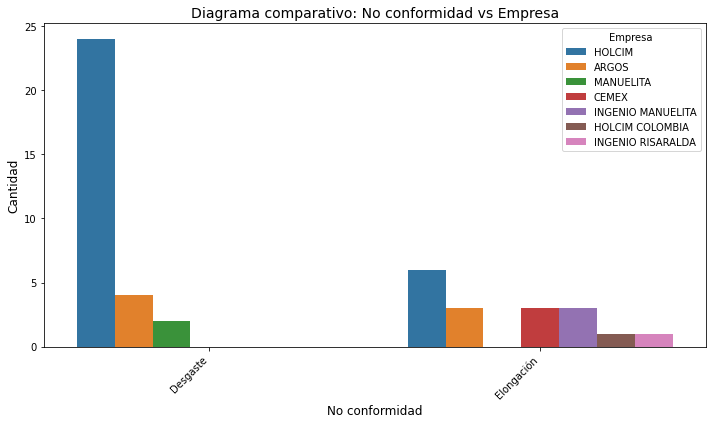

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Local\Temp\ipykernel_13176\2377477063.py:25: UserWarning:

Gl

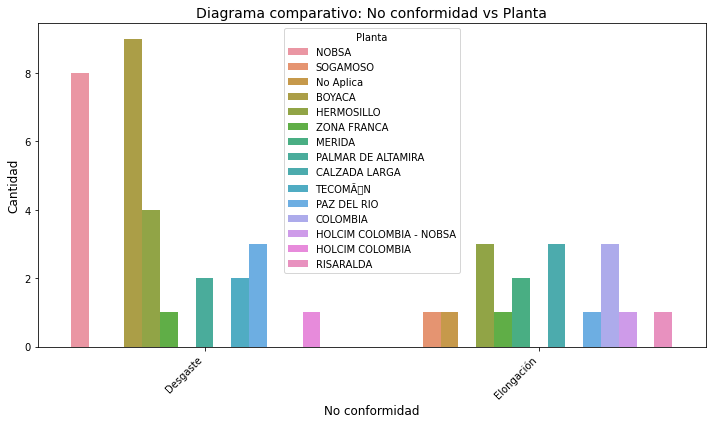

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



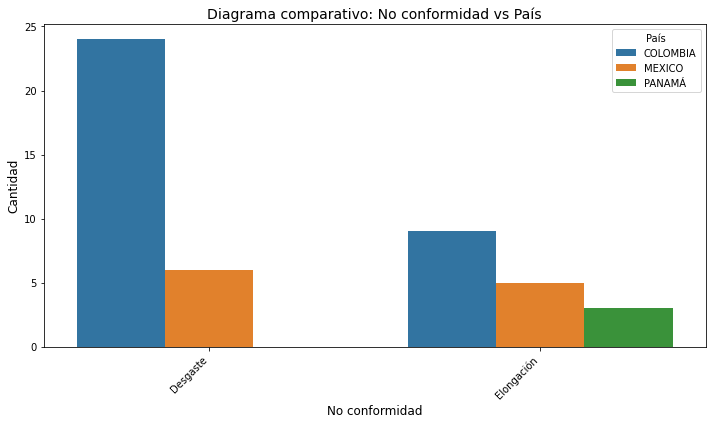

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Local\Temp\ipykernel_13176\2377477063.py:25: UserWarning:

Gl

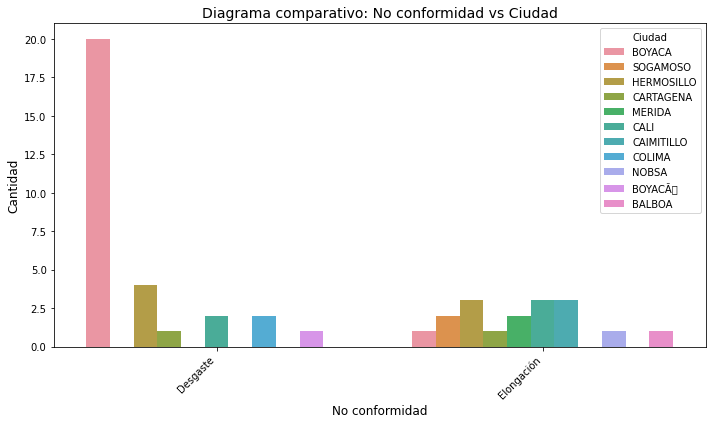

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



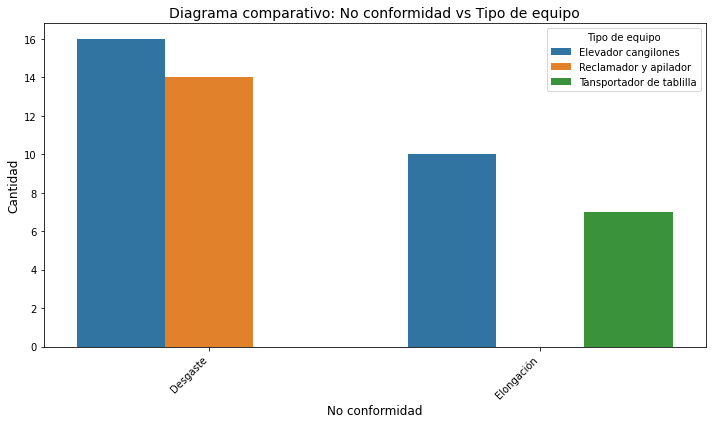

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



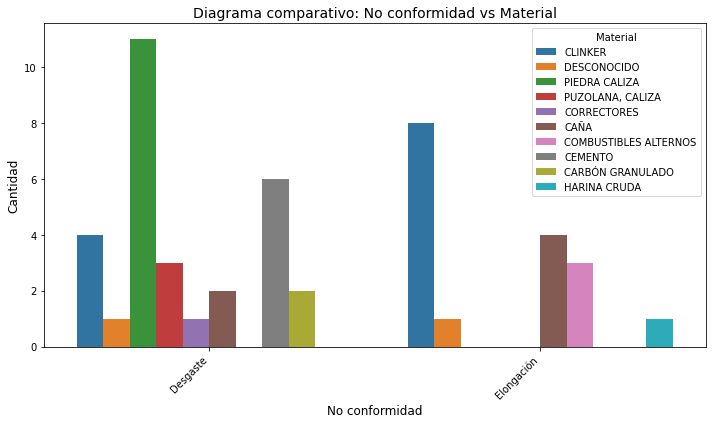

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



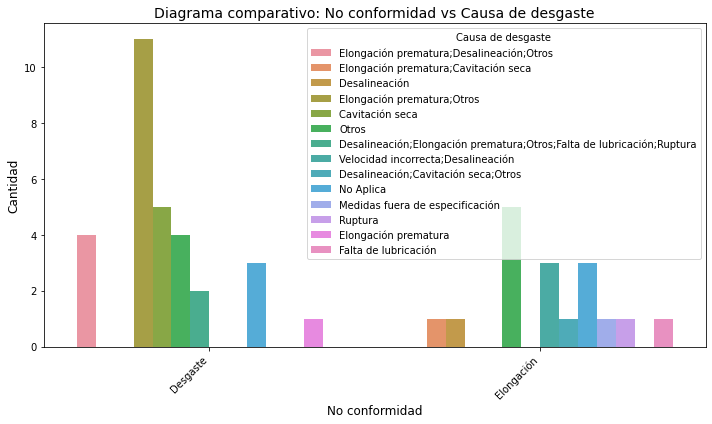

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



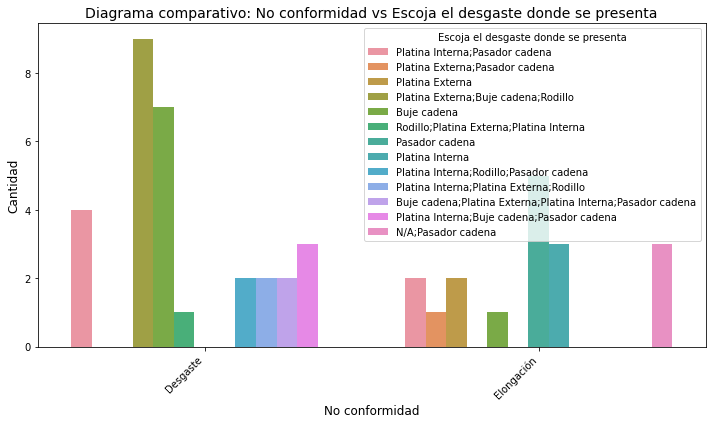

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



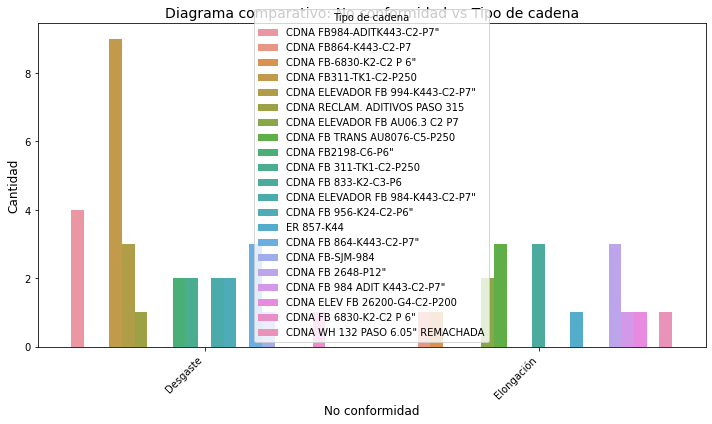

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



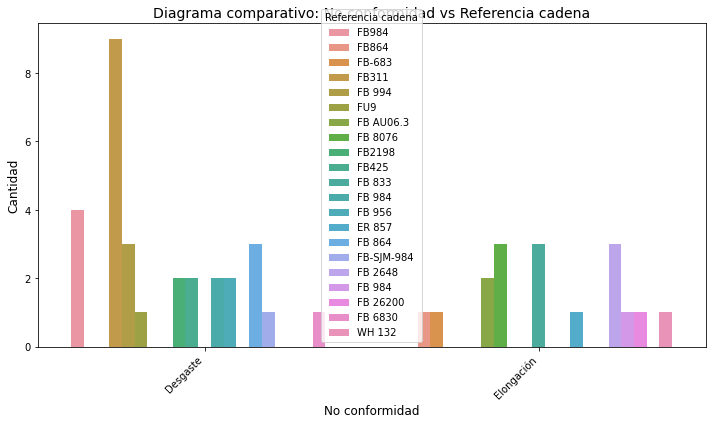

In [290]:
# Renombrar la columna 'Falla' a 'No conformidad'
BD_fallas.rename(columns={'Falla': 'No conformidad'}, inplace=True)

# Lista de las columnas con las que vamos a comparar 'No conformidad'
variables = ['Actividad', 'RecMAQ', 'RecHOM', 'Empresa', 'Planta', 'País',
             'Ciudad', 'Tipo de equipo', 'Material', 'Causa de desgaste',
             'Escoja el desgaste donde se presenta', 'Tipo de cadena', 'Referencia cadena']

# Crear un gráfico de barras comparativo para cada variable
for variable in variables:
    plt.figure(figsize=(10, 6))
    
    # Usamos seaborn para hacer un gráfico de barras comparativo
    sns.countplot(data=BD_fallas, x='No conformidad', hue=variable)
    
    # Título y etiquetas
    plt.title(f'Diagrama comparativo: No conformidad vs {variable}', fontsize=14)
    plt.xlabel('No conformidad', fontsize=12)
    plt.ylabel('Cantidad', fontsize=12)
    
    # Rotar etiquetas del eje x si es necesario
    plt.xticks(rotation=45, ha='right')
    
    # Mostrar gráfico
    plt.tight_layout()
    plt.show()


In [291]:
BD_fallas.head()

,ConsecutivoOP,ConsecPedido,Cliente,Producto,NombProducto,OCCliente,Actividad,RecMAQ,RecHOM,SecAct,...,Medida actual en mm2 (RODILLO),Porcentaje de desgaste actual % (RODILLO),Altura de la platina en mm,Medida actual de la platina en mm (PLATINA),Porcentaje de desgaste actual % (PLATINA),Paso en mm,Cantidad de pasos,No conformidad,Porcentaje de no conformidad,Tiempo hasta falla (Dias)
0,65433,26765,860009808,30351506C,PLATINA,4530313020,CORT2,OXICORTE Y PLASMA,CORTAR,1,...,No Aplica,No Aplica,102.0,101.0,0.98,177.8,6.0,Desgaste,0.98,489
4,65431,26765,860009808,30351506A,BUJE,4530313020,CORT,MEGAS,CORTAR,1,...,No Aplica,No Aplica,102.0,101.0,0.98,177.8,6.0,Desgaste,0.98,489
8,65430,26765,860009808,30351506,CADENA,4530313020,PINA1,BANCO DE TRABAJO ENSAMBLE,PRODUCTO TERMINADO,4,...,No Aplica,No Aplica,102.0,101.0,0.98,177.8,6.0,Desgaste,0.98,522
12,65434,26765,860009808,30351506D,PLATINA,4530313020,CORT4,OXICORTE Y PLASMA,CORTAR,1,...,No Aplica,No Aplica,102.0,101.0,0.98,177.8,6.0,Desgaste,0.98,521
16,54312,23311,890100251,1018018,CADENA,4500529054,ENSA,PRENSA ANCLAJES,FORJADO,1,...,No Aplica,No Aplica,No Aplica,No Aplica,No Aplica,No Aplica,No Aplica,Elongación,1.68,1145



#

# Modelo para la base de datos

#### Organizar la base de datos para el modelo Para iniciar con el modelo para cadenas

In [292]:
BD_fallas.columns

Index(['ConsecutivoOP', 'ConsecPedido', 'Cliente', 'Producto', 'NombProducto',
       'OCCliente', 'Actividad', 'RecMAQ', 'RecHOM', 'SecAct', 'FechEstInicil',
       'estado', 'TipoConsecutivo', 'Fecha de visita', 'Empresa', 'Planta',
       'País', 'Ciudad', 'Tipo de equipo', 'Pedido', 'Material',
       'Causa de desgaste', 'Si escogió otros, ¿cuál?',
       'Escoja el desgaste donde se presenta', 'Tipo de cadena',
       'Referencia cadena',
       'Medida referencia de control desgaste nueva en mm (CADENA)',
       'Medida referencia control de desgaste actual en mm (CADENA)',
       'Porcentaje de elongación actual % (CADENA)',
       'Porcentaje de elongación máx % (CADENA)',
       'Proyección en horas de operación restantes (H) (CADENA)',
       'Medida sin desgaste en mm (BUJE)', 'Medida actual en mm1 (BUJE)',
       'Porcentaje de desgaste actual % (BUJE)',
       'Medida sin desgaste en mm1 (PASADOR)', 'Medida actual en mm (PASADOR)',
       'Porcentaje de desgaste actual % 

In [293]:
BD_fallas.head()

,ConsecutivoOP,ConsecPedido,Cliente,Producto,NombProducto,OCCliente,Actividad,RecMAQ,RecHOM,SecAct,...,Medida actual en mm2 (RODILLO),Porcentaje de desgaste actual % (RODILLO),Altura de la platina en mm,Medida actual de la platina en mm (PLATINA),Porcentaje de desgaste actual % (PLATINA),Paso en mm,Cantidad de pasos,No conformidad,Porcentaje de no conformidad,Tiempo hasta falla (Dias)
0,65433,26765,860009808,30351506C,PLATINA,4530313020,CORT2,OXICORTE Y PLASMA,CORTAR,1,...,No Aplica,No Aplica,102.0,101.0,0.98,177.8,6.0,Desgaste,0.98,489
4,65431,26765,860009808,30351506A,BUJE,4530313020,CORT,MEGAS,CORTAR,1,...,No Aplica,No Aplica,102.0,101.0,0.98,177.8,6.0,Desgaste,0.98,489
8,65430,26765,860009808,30351506,CADENA,4530313020,PINA1,BANCO DE TRABAJO ENSAMBLE,PRODUCTO TERMINADO,4,...,No Aplica,No Aplica,102.0,101.0,0.98,177.8,6.0,Desgaste,0.98,522
12,65434,26765,860009808,30351506D,PLATINA,4530313020,CORT4,OXICORTE Y PLASMA,CORTAR,1,...,No Aplica,No Aplica,102.0,101.0,0.98,177.8,6.0,Desgaste,0.98,521
16,54312,23311,890100251,1018018,CADENA,4500529054,ENSA,PRENSA ANCLAJES,FORJADO,1,...,No Aplica,No Aplica,No Aplica,No Aplica,No Aplica,No Aplica,No Aplica,Elongación,1.68,1145


In [294]:
# Lista de las columnas que deseas eliminar
columnas_a_eliminar = [
    'ConsecutivoOP', 'Producto','ConsecPedido', 'Cliente', 'OCCliente', 'SecAct', 'estado',
    'TipoConsecutivo', 'Pedido', 'Medida referencia de control desgaste nueva en mm (CADENA)', 
    'Medida referencia control de desgaste actual en mm (CADENA)', 'Porcentaje de elongación actual % (CADENA)', 
    'Porcentaje de elongación máx % (CADENA)', 'Proyección en horas de operación restantes (H) (CADENA)', 
    'Medida sin desgaste en mm (BUJE)', 'Medida actual en mm1 (BUJE)', 'Porcentaje de desgaste actual % (BUJE)', 
    'Medida sin desgaste en mm1 (PASADOR)', 'Medida actual en mm (PASADOR)', 
    'Porcentaje de desgaste actual % (PASADOR)', 'Medida sin desgaste en mm2 (RODILLO)', 
    'Medida actual en mm2 (RODILLO)', 'Porcentaje de desgaste actual % (RODILLO)', 
    'Altura de la platina en mm', 'Medida actual de la platina en mm (PLATINA)', 
    'Porcentaje de desgaste actual % (PLATINA)', 'Paso en mm', 'Cantidad de pasos', 'FechEstInicil', 'Fecha de visita',
    'Actividad','RecMAQ','RecHOM'
]

# Generar un nuevo DataFrame eliminando las columnas especificadas
BD_fallasD = BD_fallas.drop(columns=columnas_a_eliminar)

# Verificar las primeras filas del nuevo DataFrame para asegurarte que se eliminaron correctamente
BD_fallasD.head()


,NombProducto,Empresa,Planta,País,Ciudad,Tipo de equipo,Material,Causa de desgaste,"Si escogió otros, ¿cuál?",Escoja el desgaste donde se presenta,Tipo de cadena,Referencia cadena,No conformidad,Porcentaje de no conformidad,Tiempo hasta falla (Dias)
0,PLATINA,HOLCIM,NOBSA,COLOMBIA,BOYACA,Elevador cangilones,CLINKER,Elongación prematura;Desalineación;Otros,DESGASTE DE GUIAS,Platina Interna;Pasador cadena,"CDNA FB984-ADITK443-C2-P7""",FB984,Desgaste,0.98,489
4,BUJE,HOLCIM,NOBSA,COLOMBIA,BOYACA,Elevador cangilones,CLINKER,Elongación prematura;Desalineación;Otros,DESGASTE DE GUIAS,Platina Interna;Pasador cadena,"CDNA FB984-ADITK443-C2-P7""",FB984,Desgaste,0.98,489
8,CADENA,HOLCIM,NOBSA,COLOMBIA,BOYACA,Elevador cangilones,CLINKER,Elongación prematura;Desalineación;Otros,DESGASTE DE GUIAS,Platina Interna;Pasador cadena,"CDNA FB984-ADITK443-C2-P7""",FB984,Desgaste,0.98,522
12,PLATINA,HOLCIM,NOBSA,COLOMBIA,BOYACA,Elevador cangilones,CLINKER,Elongación prematura;Desalineación;Otros,DESGASTE DE GUIAS,Platina Interna;Pasador cadena,"CDNA FB984-ADITK443-C2-P7""",FB984,Desgaste,0.98,521
16,CADENA,ARGOS,SOGAMOSO,COLOMBIA,SOGAMOSO,Elevador cangilones,CLINKER,Elongación prematura;Cavitación seca,No Aplica,Platina Externa;Pasador cadena,CDNA FB864-K443-C2-P7,FB864,Elongación,1.68,1145


In [295]:
BD_fallasD.isnull().sum()

NombProducto                            0
Empresa                                 0
Planta                                  0
País                                    0
Ciudad                                  0
Tipo de equipo                          0
Material                                0
Causa de desgaste                       0
Si escogió otros, ¿cuál?                0
Escoja el desgaste donde se presenta    0
Tipo de cadena                          0
Referencia cadena                       0
No conformidad                          0
Porcentaje de no conformidad            0
Tiempo hasta falla (Dias)               0
dtype: int64

In [296]:
# Convertir todos los valores a su valor absoluto en la columna 'Tiempo hasta falla (Dias)'
BD_fallasD['Tiempo hasta falla (Dias)'] = BD_fallasD['Tiempo hasta falla (Dias)'].abs()

# Verificar los cambios
print("Valores únicos en 'Tiempo hasta falla (Dias)' (convertidos a positivos):", BD_fallas2['Tiempo hasta falla (Dias)'].unique())


Valores únicos en 'Tiempo hasta falla (Dias)' (convertidos a positivos): [ 489  522  521 1145  643  396  883  982  278  499  276  343  342  -19
 -181 -140  196  178  426  846  894  592  806  166  -45]


In [297]:
# Remosión de outliers 
# Lista de valores a eliminar
valores_a_eliminar = [18.69, 6.11, 9.48, 4.97, 4, 3.38, 3.25, 3.09]

# Filtrar el DataFrame para eliminar filas con esos valores en 'Porcentaje de no conformidad'
BD_fallasD = BD_fallasD[~BD_fallasD['Porcentaje de no conformidad'].isin(valores_a_eliminar)]

# Verificar que se eliminaron las filas
print("Valores únicos en 'Porcentaje de no conformidad':", BD_fallasD['Porcentaje de no conformidad'].unique())


Valores únicos en 'Porcentaje de no conformidad': [0.98  1.68  0.26  0.286 1.1   0.14  0.18  2.3   0.45  0.47  0.22  0.32
 1.77  0.88  0.5  ]


In [298]:
# Cambiar los nombres de las columnas
BD_fallasD.rename(columns={
    "Falla": "No conformidad",
    "Valor": "Porcentaje de no conformidad"
}, inplace=True)

# Verifica los cambios
BD_fallasD.head()

,NombProducto,Empresa,Planta,País,Ciudad,Tipo de equipo,Material,Causa de desgaste,"Si escogió otros, ¿cuál?",Escoja el desgaste donde se presenta,Tipo de cadena,Referencia cadena,No conformidad,Porcentaje de no conformidad,Tiempo hasta falla (Dias)
0,PLATINA,HOLCIM,NOBSA,COLOMBIA,BOYACA,Elevador cangilones,CLINKER,Elongación prematura;Desalineación;Otros,DESGASTE DE GUIAS,Platina Interna;Pasador cadena,"CDNA FB984-ADITK443-C2-P7""",FB984,Desgaste,0.98,489
4,BUJE,HOLCIM,NOBSA,COLOMBIA,BOYACA,Elevador cangilones,CLINKER,Elongación prematura;Desalineación;Otros,DESGASTE DE GUIAS,Platina Interna;Pasador cadena,"CDNA FB984-ADITK443-C2-P7""",FB984,Desgaste,0.98,489
8,CADENA,HOLCIM,NOBSA,COLOMBIA,BOYACA,Elevador cangilones,CLINKER,Elongación prematura;Desalineación;Otros,DESGASTE DE GUIAS,Platina Interna;Pasador cadena,"CDNA FB984-ADITK443-C2-P7""",FB984,Desgaste,0.98,522
12,PLATINA,HOLCIM,NOBSA,COLOMBIA,BOYACA,Elevador cangilones,CLINKER,Elongación prematura;Desalineación;Otros,DESGASTE DE GUIAS,Platina Interna;Pasador cadena,"CDNA FB984-ADITK443-C2-P7""",FB984,Desgaste,0.98,521
16,CADENA,ARGOS,SOGAMOSO,COLOMBIA,SOGAMOSO,Elevador cangilones,CLINKER,Elongación prematura;Cavitación seca,No Aplica,Platina Externa;Pasador cadena,CDNA FB864-K443-C2-P7,FB864,Elongación,1.68,1145


In [299]:
BD_fallasD.columns

Index(['NombProducto', 'Empresa', 'Planta', 'País', 'Ciudad', 'Tipo de equipo',
       'Material', 'Causa de desgaste', 'Si escogió otros, ¿cuál?',
       'Escoja el desgaste donde se presenta', 'Tipo de cadena',
       'Referencia cadena', 'No conformidad', 'Porcentaje de no conformidad',
       'Tiempo hasta falla (Dias)'],
      dtype='object')

In [300]:
BD_fallasD.shape

(38, 15)

In [301]:
# Filtra las filas donde 'NombProducto' contenga la palabra 'CADENA'
BD_fallasD = BD_fallasD[BD_fallasD['NombProducto'].str.contains('CADENA', case=False, na=False)]

# Muestra los resultados filtrados
BD_fallasD.head()


,NombProducto,Empresa,Planta,País,Ciudad,Tipo de equipo,Material,Causa de desgaste,"Si escogió otros, ¿cuál?",Escoja el desgaste donde se presenta,Tipo de cadena,Referencia cadena,No conformidad,Porcentaje de no conformidad,Tiempo hasta falla (Dias)
8,CADENA,HOLCIM,NOBSA,COLOMBIA,BOYACA,Elevador cangilones,CLINKER,Elongación prematura;Desalineación;Otros,DESGASTE DE GUIAS,Platina Interna;Pasador cadena,"CDNA FB984-ADITK443-C2-P7""",FB984,Desgaste,0.980,522
16,CADENA,ARGOS,SOGAMOSO,COLOMBIA,SOGAMOSO,Elevador cangilones,CLINKER,Elongación prematura;Cavitación seca,No Aplica,Platina Externa;Pasador cadena,CDNA FB864-K443-C2-P7,FB864,Elongación,1.680,1145
17,CADENA,HOLCIM,No Aplica,COLOMBIA,BOYACA,Elevador cangilones,DESCONOCIDO,Desalineación,No Aplica,Platina Externa,"CDNA FB-6830-K2-C2 P 6""",FB-683,Elongación,0.260,643
54,CADENA,HOLCIM,BOYACA,COLOMBIA,BOYACA,Reclamador y apilador,PIEDRA CALIZA,Elongación prematura;Otros,EXCESIVA TENSION,Platina Externa;Buje cadena;Rodillo,CDNA FB311-TK1-C2-P250,FB311,Desgaste,0.286,396
105,CADENA,HOLCIM,HERMOSILLO,MEXICO,HERMOSILLO,Elevador cangilones,"PUZOLANA, CALIZA",Cavitación seca,MAL ESTADO RUEDA MOTRIZ Y TENSOR,Buje cadena,"CDNA ELEVADOR FB 994-K443-C2-P7""",FB 994,Desgaste,1.100,883


In [302]:
### Quitar el numeral para descagar la base de datos.
BD_fallasD.to_csv('BD_fallasD.csv', index=False)

### Modelo cadenas

# Prueba

In [303]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Cargar datos
data =BD_fallasD

# Separar variables predictoras y objetivo
X = data.drop(columns=['Porcentaje de no conformidad'])
y = data['Porcentaje de no conformidad']

# Identificar columnas categóricas y numéricas
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocesamiento: One-Hot Encoding para categóricas, Escalado para numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ]
)

# Selección de variables
feature_selector = SelectKBest(score_func=f_regression, k='all')  # Cambiar 'all' por el número deseado de características

# Definir modelos candidatos

m_tree_reg = DecisionTreeRegressor(random_state=42)
m_rf_reg = RandomForestRegressor(random_state=42)
m_gbt_reg = GradientBoostingRegressor(random_state=42)

models = {
    'Decision Tree': m_tree_reg,
    'Random Forest': m_rf_reg,
    'Gradient Boosting': m_gbt_reg
}

# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluar modelos
results = []
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('feature_selection', feature_selector),  # Selección de variables
        ('model', model)
    ])
    pipeline.fit(X_train, y_train)
    
    # Predicciones
    y_pred = pipeline.predict(X_test)
    
    # Métricas
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    results.append((name, mse, mae, mape))

# Crear un DataFrame con los resultados
results_df = pd.DataFrame(results, columns=['Model', 'MSE', 'MAE', 'MAPE'])

# Ordenar por MSE
results_df = results_df.sort_values(by='MSE')

# Mostrar el mejor modelo
best_model = results_df.iloc[0]
print("Resultados de los modelos:")
print(results_df)
print("\nEl mejor modelo es:")
print(best_model)

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning:

Found unknown categories in columns [1, 2, 4, 7, 8, 9, 10, 11] during transform. These unknown categories will be encoded as all zeros



Resultados de los modelos:
               Model       MSE       MAE       MAPE
1      Random Forest  0.254369  0.452767  68.168089
0      Decision Tree  0.269900  0.416667  48.801793
2  Gradient Boosting  0.273223  0.422914  48.596412

El mejor modelo es:
Model    Random Forest
MSE           0.254369
MAE           0.452767
MAPE         68.168089
Name: 1, dtype: object


C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning:

Found unknown categories in columns [1, 2, 4, 7, 8, 9, 10, 11] during transform. These unknown categories will be encoded as all zeros

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning:

Found unknown categories in columns [1, 2, 4, 7, 8, 9, 10, 11] during transform. These unknown categories will be encoded as all zeros



In [304]:
from sklearn.model_selection import GridSearchCV
import joblib

# Configuración de hiperparámetros para cada modelo
param_grid = {
    'Decision Tree': {
        'model__max_depth': [None, 10, 20, 30, 40],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4]
    },
    'Random Forest': {
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [None, 10, 20, 30],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4]
    },
    'Gradient Boosting': {
        'model__n_estimators': [50, 100, 200],
        'model__learning_rate': [0.01, 0.1, 0.2],
        'model__max_depth': [3, 5, 7],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4]
    }
}

# Obtener el modelo ganador desde el DataFrame de resultados
best_model_name = results_df.iloc[0]['Model']  # Seleccionar el modelo con menor MSE (ya está ordenado en results_df)

# Validar que el modelo existe en el diccionario
if best_model_name not in models:
    raise ValueError(f"El modelo {best_model_name} no se encuentra en la lista de modelos disponibles.")

best_model = models[best_model_name]

# Configurar el pipeline con el modelo ganador
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', feature_selector),
    ('model', best_model)
])

# Configurar el GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid[best_model_name],
    scoring='neg_mean_squared_error',  # Usar MSE como métrica de optimización
    cv=5,  # Validación cruzada
    n_jobs=-1,  # Usar todos los núcleos disponibles
    verbose=2
)

# Ajustar el modelo con los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Mejor modelo y sus hiperparámetros
best_pipeline = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"El mejor modelo ajustado es {best_model_name} con los siguientes hiperparámetros:")
print(best_params)

# Evaluar el mejor modelo en el conjunto de prueba
y_pred = best_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("\nDesempeño del modelo ajustado en el conjunto de prueba:")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2f}%")

# Comparar todos los modelos y exportar el mejor
all_results = []
for model_name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('feature_selection', feature_selector),
        ('model', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    all_results.append((model_name, mse, mae, mape, pipeline))

# Seleccionar el mejor modelo por MSE
best_overall_model = min(all_results, key=lambda x: x[1])

print("\nEl mejor modelo final es:")
print(f"Modelo: {best_overall_model[0]}, MSE: {best_overall_model[1]:.4f}, MAE: {best_overall_model[2]:.4f}, MAPE: {best_overall_model[3]:.2f}%")

# Exportar el mejor modelo
joblib.dump({
    'pipeline': best_pipeline,  # El pipeline completo
    'model_name': best_model_name,
    'best_params': best_params,
    'mse': mse,
    'mae': mae,
    'mape': mape
}, 'best_model.pkl')
print("\nEl mejor modelo ha sido exportado como 'best_model.pkl'")

Fitting 5 folds for each of 108 candidates, totalling 540 fits


El mejor modelo ajustado es Random Forest con los siguientes hiperparámetros:
{'model__max_depth': None, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 100}

Desempeño del modelo ajustado en el conjunto de prueba:
MSE: 0.2530
MAE: 0.4531
MAPE: 68.31%


C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning:

Found unknown categories in columns [1, 2, 4, 7, 8, 9, 10, 11] during transform. These unknown categories will be encoded as all zeros

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning:

Found unknown categories in columns [1, 2, 4, 7, 8, 9, 10, 11] during transform. These unknown categories will be encoded as all zeros

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning:

Found unknown categories in columns [1, 2, 4, 7, 8, 9, 10, 11] during transform. These unknown categories will be encoded as all zeros




El mejor modelo final es:
Modelo: Random Forest, MSE: 0.2544, MAE: 0.4528, MAPE: 68.17%

El mejor modelo ha sido exportado como 'best_model.pkl'


C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning:

Found unknown categories in columns [1, 2, 4, 7, 8, 9, 10, 11] during transform. These unknown categories will be encoded as all zeros



In [305]:
import pandas as pd
import joblib
from dash import Dash, dcc, html, Input, Output


# Filtrar referencias de cadena con valores válidos para "Porcentaje de elongación máx % (CADENA)"
referencias_validas = BD_fallas[
    pd.to_numeric(BD_fallas['Porcentaje de elongación máx % (CADENA)'], errors='coerce').notna()
]['Referencia cadena'].unique()

# Variables y valores únicos (con referencias filtradas)
variables = ['NombProducto', 'Empresa', 'Planta', 'País', 'Ciudad', 'Tipo de equipo',
             'Material', 'Causa de desgaste', 'Si escogió otros, ¿cuál?',
             'Escoja el desgaste donde se presenta', 'Tipo de cadena',
             'Referencia cadena', 'No conformidad', 'Tiempo hasta falla (Dias)']
valores_unicos = {var: BD_fallas[var].unique().tolist() for var in variables}
valores_unicos['Referencia cadena'] = referencias_validas  # Actualizar referencias válidas

# Cargar el modelo exportado junto con sus metadatos
best_model_path = 'best_model.pkl'
model_data = joblib.load(best_model_path)

# Extraer el pipeline y los detalles del modelo desde el archivo
model_pipeline = model_data.get('pipeline')
best_model_name = model_data.get('model_name', 'Modelo Desconocido')
best_params = model_data.get('best_params', {})
mse = model_data.get('mse', 'N/A')
mae = model_data.get('mae', 'N/A')
mape = model_data.get('mape', 'N/A')

# Inspeccionar el modelo cargado
print("Pipeline cargado del modelo:")
print(model_pipeline)

# Iniciar la aplicación Dash
app = Dash(__name__)

# Layout de la aplicación
app.layout = html.Div([
    html.H1("Predicción del Porcentaje de No Conformidad"),
    
    # Sección de resultados del modelo
    html.Div([
        html.H3("Resultados del Modelo"),
        html.P(f"Mejor modelo seleccionado: {best_model_name}"),
        html.P(f"Hiperparámetros óptimos: {best_params}"),
        html.P(f"MSE: {mse:.2f}" if mse != 'N/A' else "MSE: No disponible"),
        html.P(f"MAE: {mae:.2f}" if mae != 'N/A' else "MAE: No disponible"),
        html.P(f"MAPE: {mape:.2f}%" if mape != 'N/A' else "MAPE: No disponible")
    ], style={'border': '1px solid black', 'padding': '10px', 'margin-bottom': '20px'}),
    
    # Interfaz para selección de variables y predicción
    html.Div([
        html.Div([
            html.Label(var),
            dcc.Dropdown(
                id=f'dropdown-{var}',
                options=[{'label': val, 'value': val} for val in valores_unicos[var]],
                value=valores_unicos[var][0]
            )
        ]) for var in variables
    ]),
    html.Br(),
    html.Label("Horas actuales de servicio (HAS):"),
    dcc.Input(
        id='input-has',
        type='number',
        placeholder='Ingrese las horas actuales de servicio',
        style={'margin-bottom': '20px'}
    ),
    html.Div(id='output-prediccion', style={'font-size': '20px', 'font-weight': 'bold'}),
    html.Div(id='output-hps', style={'font-size': '20px', 'font-weight': 'bold', 'margin-top': '10px'})
])

# Callback para actualizar la predicción y calcular HPS
@app.callback(
    [Output('output-prediccion', 'children'),
     Output('output-hps', 'children')],
    [Input(f'dropdown-{var}', 'value') for var in variables] +
    [Input('input-has', 'value')]
)
def actualizar_prediccion_y_hps(*valores):
    try:
        # Último valor es HAS
        has = valores[-1]
        valores = valores[:-1]
        
        # Crear un DataFrame con las variables seleccionadas
        entrada = pd.DataFrame({var: [val] for var, val in zip(variables, valores)})

        # Verificar el DataFrame de entrada
        print("Entrada para la predicción:")
        print(entrada)

        # Realizar la predicción
        prediccion = model_pipeline.predict(entrada)[0]
        prediccion_texto = f"Porcentaje de No Conformidad: {prediccion:.2f}%"

        # Buscar el porcentaje de elongación máximo en BD_fallas
        referencia_cadena = entrada['Referencia cadena'][0]
        porcentaje_elongacion = BD_fallas.loc[
            BD_fallas['Referencia cadena'] == referencia_cadena, 
            'Porcentaje de elongación máx % (CADENA)'
        ].values

        if len(porcentaje_elongacion) == 0:
            return prediccion_texto, "Referencia de cadena no encontrada en la base de datos."

        porcentaje_elongacion = float(porcentaje_elongacion[0])

        # Verificar que HAS sea válido
        if has is None or has <= 0:
            return prediccion_texto, "Por favor, ingrese un valor válido para las horas actuales de servicio (HAS)."

        # Calcular las horas proyectadas de servicio (HPS)
        hps = (porcentaje_elongacion / prediccion) * has
        hps_texto = f"Horas Proyectadas de Servicio (HPS): {hps:.2f}"

        return prediccion_texto, hps_texto

    except Exception as e:
        # Manejo de errores
        return f"Error en la predicción: {str(e)}", ""

# Ejecutar la aplicación localmente
if __name__ == '__main__':
    app.run_server(debug=True, port=8051)


Pipeline cargado del modelo:
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Tiempo hasta falla (Dias)'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  Index(['NombProducto', 'Empresa', 'Planta', 'País', 'Ciudad', 'Tipo de equipo',
       'Material', 'Causa de desgaste', 'Si escogió otros, ¿cuál?',
       'Escoja el desgaste donde se presenta', 'Tipo de cadena',
       'Referencia cadena', 'No conformidad'],
      dtype='object'))])),
                ('feature_selection',
                 SelectKBest(k='all',
                             score_func=<function f_regression at 0x000001AEEC9031C0>)),
                ('model',
     

Entrada para la predicción:
  NombProducto Empresa Planta      País  Ciudad       Tipo de equipo Material  \
0      PLATINA  HOLCIM  NOBSA  COLOMBIA  BOYACA  Elevador cangilones  CLINKER   

                          Causa de desgaste Si escogió otros, ¿cuál?  \
0  Elongación prematura;Desalineación;Otros        DESGASTE DE GUIAS   

  Escoja el desgaste donde se presenta              Tipo de cadena  \
0       Platina Interna;Pasador cadena  CDNA FB984-ADITK443-C2-P7"   

  Referencia cadena No conformidad  Tiempo hasta falla (Dias)  
0             FB864       Desgaste                        489  


C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning:

Found unknown categories in columns [0, 2, 7, 8, 9, 10] during transform. These unknown categories will be encoded as all zeros



Entrada para la predicción:
  NombProducto Empresa Planta      País  Ciudad       Tipo de equipo Material  \
0       CADENA  HOLCIM  NOBSA  COLOMBIA  BOYACA  Elevador cangilones  CLINKER   

                          Causa de desgaste Si escogió otros, ¿cuál?  \
0  Elongación prematura;Desalineación;Otros        DESGASTE DE GUIAS   

  Escoja el desgaste donde se presenta              Tipo de cadena  \
0       Platina Interna;Pasador cadena  CDNA FB984-ADITK443-C2-P7"   

  Referencia cadena No conformidad  Tiempo hasta falla (Dias)  
0             FB864       Desgaste                        489  


C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning:

Found unknown categories in columns [2, 7, 8, 9, 10] during transform. These unknown categories will be encoded as all zeros



Entrada para la predicción:
  NombProducto Empresa Planta      País  Ciudad       Tipo de equipo Material  \
0       CADENA  HOLCIM  NOBSA  COLOMBIA  BOYACA  Elevador cangilones  CLINKER   

                          Causa de desgaste Si escogió otros, ¿cuál?  \
0  Elongación prematura;Desalineación;Otros        DESGASTE DE GUIAS   

  Escoja el desgaste donde se presenta              Tipo de cadena  \
0       Platina Interna;Pasador cadena  CDNA FB984-ADITK443-C2-P7"   

  Referencia cadena No conformidad  Tiempo hasta falla (Dias)  
0             FB864       Desgaste                        489  
Entrada para la predicción:
  NombProducto Empresa Planta      País  Ciudad       Tipo de equipo Material  \
0       CADENA  HOLCIM  NOBSA  COLOMBIA  BOYACA  Elevador cangilones  CLINKER   

                          Causa de desgaste Si escogió otros, ¿cuál?  \
0  Elongación prematura;Desalineación;Otros        DESGASTE DE GUIAS   

  Escoja el desgaste donde se presenta              Tipo de

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning:

Found unknown categories in columns [2, 7, 8, 9, 10] during transform. These unknown categories will be encoded as all zeros

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning:

Found unknown categories in columns [2, 7, 8, 9, 10] during transform. These unknown categories will be encoded as all zeros



Entrada para la predicción:
  NombProducto Empresa Planta      País  Ciudad       Tipo de equipo Material  \
0       CADENA  HOLCIM  NOBSA  COLOMBIA  BOYACA  Elevador cangilones  CLINKER   

                          Causa de desgaste Si escogió otros, ¿cuál?  \
0  Elongación prematura;Desalineación;Otros        DESGASTE DE GUIAS   

  Escoja el desgaste donde se presenta              Tipo de cadena  \
0       Platina Interna;Pasador cadena  CDNA FB984-ADITK443-C2-P7"   

  Referencia cadena No conformidad  Tiempo hasta falla (Dias)  
0             FB864       Desgaste                        489  


C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning:

Found unknown categories in columns [2, 7, 8, 9, 10] during transform. These unknown categories will be encoded as all zeros



Entrada para la predicción:
  NombProducto Empresa Planta      País  Ciudad       Tipo de equipo Material  \
0       CADENA  HOLCIM  NOBSA  COLOMBIA  BOYACA  Elevador cangilones  CLINKER   

                          Causa de desgaste Si escogió otros, ¿cuál?  \
0  Elongación prematura;Desalineación;Otros        DESGASTE DE GUIAS   

  Escoja el desgaste donde se presenta              Tipo de cadena  \
0       Platina Interna;Pasador cadena  CDNA FB984-ADITK443-C2-P7"   

  Referencia cadena No conformidad  Tiempo hasta falla (Dias)  
0             FB864       Desgaste                        489  
Entrada para la predicción:
  NombProducto Empresa Planta      País  Ciudad       Tipo de equipo Material  \
0       CADENA  HOLCIM  NOBSA  COLOMBIA  BOYACA  Elevador cangilones  CLINKER   

                          Causa de desgaste Si escogió otros, ¿cuál?  \
0  Elongación prematura;Desalineación;Otros        DESGASTE DE GUIAS   

  Escoja el desgaste donde se presenta              Tipo de

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning:

Found unknown categories in columns [2, 7, 8, 9, 10] during transform. These unknown categories will be encoded as all zeros

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning:

Found unknown categories in columns [2, 7, 8, 9, 10] during transform. These unknown categories will be encoded as all zeros



Entrada para la predicción:
  NombProducto Empresa Planta      País  Ciudad       Tipo de equipo Material  \
0       CADENA  HOLCIM  NOBSA  COLOMBIA  BOYACA  Elevador cangilones  CLINKER   

                          Causa de desgaste Si escogió otros, ¿cuál?  \
0  Elongación prematura;Desalineación;Otros        DESGASTE DE GUIAS   

  Escoja el desgaste donde se presenta              Tipo de cadena  \
0       Platina Interna;Pasador cadena  CDNA FB984-ADITK443-C2-P7"   

  Referencia cadena No conformidad  Tiempo hasta falla (Dias)  
0             FB864       Desgaste                        489  


C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning:

Found unknown categories in columns [2, 7, 8, 9, 10] during transform. These unknown categories will be encoded as all zeros



Entrada para la predicción:
  NombProducto Empresa Planta      País  Ciudad       Tipo de equipo Material  \
0       CADENA  HOLCIM  NOBSA  COLOMBIA  BOYACA  Elevador cangilones  CLINKER   

                          Causa de desgaste Si escogió otros, ¿cuál?  \
0  Elongación prematura;Desalineación;Otros        DESGASTE DE GUIAS   

  Escoja el desgaste donde se presenta              Tipo de cadena  \
0       Platina Interna;Pasador cadena  CDNA FB984-ADITK443-C2-P7"   

  Referencia cadena No conformidad  Tiempo hasta falla (Dias)  
0         FB AU06.3       Desgaste                        489  


C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning:

Found unknown categories in columns [2, 7, 8, 9, 10] during transform. These unknown categories will be encoded as all zeros



Entrada para la predicción:
  NombProducto Empresa Planta      País  Ciudad       Tipo de equipo Material  \
0       CADENA  HOLCIM  NOBSA  COLOMBIA  BOYACA  Elevador cangilones  CLINKER   

                          Causa de desgaste Si escogió otros, ¿cuál?  \
0  Elongación prematura;Desalineación;Otros        DESGASTE DE GUIAS   

  Escoja el desgaste donde se presenta              Tipo de cadena  \
0       Platina Interna;Pasador cadena  CDNA FB984-ADITK443-C2-P7"   

  Referencia cadena No conformidad  Tiempo hasta falla (Dias)  
0         FB AU06.3       Desgaste                       1145  


C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning:

Found unknown categories in columns [2, 7, 8, 9, 10] during transform. These unknown categories will be encoded as all zeros



Entrada para la predicción:
  NombProducto Empresa Planta      País  Ciudad       Tipo de equipo Material  \
0       CADENA  HOLCIM  NOBSA  COLOMBIA  BOYACA  Elevador cangilones  CLINKER   

                          Causa de desgaste Si escogió otros, ¿cuál?  \
0  Elongación prematura;Desalineación;Otros        DESGASTE DE GUIAS   

  Escoja el desgaste donde se presenta              Tipo de cadena  \
0       Platina Interna;Pasador cadena  CDNA FB984-ADITK443-C2-P7"   

  Referencia cadena No conformidad  Tiempo hasta falla (Dias)  
0         FB AU06.3       Desgaste                        521  


C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning:

Found unknown categories in columns [2, 7, 8, 9, 10] during transform. These unknown categories will be encoded as all zeros



Entrada para la predicción:
  NombProducto Empresa Planta      País  Ciudad       Tipo de equipo Material  \
0         BUJE  HOLCIM  NOBSA  COLOMBIA  BOYACA  Elevador cangilones  CLINKER   

                          Causa de desgaste Si escogió otros, ¿cuál?  \
0  Elongación prematura;Desalineación;Otros        DESGASTE DE GUIAS   

  Escoja el desgaste donde se presenta              Tipo de cadena  \
0       Platina Interna;Pasador cadena  CDNA FB984-ADITK443-C2-P7"   

  Referencia cadena No conformidad  Tiempo hasta falla (Dias)  
0         FB AU06.3       Desgaste                        521  


C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning:

Found unknown categories in columns [0, 2, 7, 8, 9, 10] during transform. These unknown categories will be encoded as all zeros



Entrada para la predicción:
  NombProducto Empresa Planta      País  Ciudad       Tipo de equipo Material  \
0       CADENA  HOLCIM  NOBSA  COLOMBIA  BOYACA  Elevador cangilones  CLINKER   

                          Causa de desgaste Si escogió otros, ¿cuál?  \
0  Elongación prematura;Desalineación;Otros        DESGASTE DE GUIAS   

  Escoja el desgaste donde se presenta              Tipo de cadena  \
0       Platina Interna;Pasador cadena  CDNA FB984-ADITK443-C2-P7"   

  Referencia cadena No conformidad  Tiempo hasta falla (Dias)  
0         FB AU06.3       Desgaste                        521  


C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning:

Found unknown categories in columns [2, 7, 8, 9, 10] during transform. These unknown categories will be encoded as all zeros



Entrada para la predicción:
  NombProducto Empresa Planta      País  Ciudad       Tipo de equipo Material  \
0       CADENA  HOLCIM  NOBSA  COLOMBIA  BOYACA  Elevador cangilones  CLINKER   

                          Causa de desgaste Si escogió otros, ¿cuál?  \
0  Elongación prematura;Desalineación;Otros        DESGASTE DE GUIAS   

  Escoja el desgaste donde se presenta              Tipo de cadena  \
0       Platina Interna;Pasador cadena  CDNA FB984-ADITK443-C2-P7"   

  Referencia cadena No conformidad  Tiempo hasta falla (Dias)  
0         FB AU06.3       Desgaste                       1145  


C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning:

Found unknown categories in columns [2, 7, 8, 9, 10] during transform. These unknown categories will be encoded as all zeros



Entrada para la predicción:
  NombProducto Empresa Planta      País  Ciudad       Tipo de equipo Material  \
0       CADENA  HOLCIM  NOBSA  COLOMBIA  BOYACA  Elevador cangilones  CLINKER   

                          Causa de desgaste Si escogió otros, ¿cuál?  \
0  Elongación prematura;Desalineación;Otros        DESGASTE DE GUIAS   

  Escoja el desgaste donde se presenta              Tipo de cadena  \
0       Platina Interna;Pasador cadena  CDNA FB984-ADITK443-C2-P7"   

  Referencia cadena No conformidad  Tiempo hasta falla (Dias)  
0         FB AU06.3       Desgaste                       1145  


C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning:

Found unknown categories in columns [2, 7, 8, 9, 10] during transform. These unknown categories will be encoded as all zeros



Entrada para la predicción:
  NombProducto Empresa Planta      País  Ciudad       Tipo de equipo Material  \
0       CADENA  HOLCIM  NOBSA  COLOMBIA  BOYACA  Elevador cangilones  CLINKER   

                          Causa de desgaste Si escogió otros, ¿cuál?  \
0  Elongación prematura;Desalineación;Otros        DESGASTE DE GUIAS   

  Escoja el desgaste donde se presenta              Tipo de cadena  \
0       Platina Interna;Pasador cadena  CDNA FB984-ADITK443-C2-P7"   

  Referencia cadena No conformidad  Tiempo hasta falla (Dias)  
0         FB AU06.3       Desgaste                       1145  
Entrada para la predicción:
  NombProducto Empresa Planta      País  Ciudad       Tipo de equipo Material  \
0       CADENA  HOLCIM  NOBSA  COLOMBIA  BOYACA  Elevador cangilones  CLINKER   

                          Causa de desgaste Si escogió otros, ¿cuál?  \
0  Elongación prematura;Desalineación;Otros        DESGASTE DE GUIAS   

  Escoja el desgaste donde se presenta              Tipo de

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning:

Found unknown categories in columns [2, 7, 8, 9, 10] during transform. These unknown categories will be encoded as all zeros

C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning:

Found unknown categories in columns [2, 7, 8, 9, 10] during transform. These unknown categories will be encoded as all zeros

